## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno
from sklearn import ensemble,tree,linear_model

## importing dataset

In [2]:
train=pd.read_csv("Downloads/train_houseprices.csv")
test=pd.read_csv("Downloads/test_houseprices.csv")

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

## checking description of data
    To check the basic description of dataset we use describe()

In [5]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [7]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [8]:
test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[5 rows x 80 columns]

In [9]:
train.shape , test.shape

((1460, 81), (1459, 80))

## Checking numerical features of dataset

In [10]:
numerical_features=train.select_dtypes(include=(np.number))
numerical_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
numerical_features.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

## DateTime Variables

In [12]:
dt_features=[feature for feature in numerical_features.columns if "Yr" in feature or "Year" in feature]
dt_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
#checking the content of dt_features
for feature in dt_features:
    print(feature,train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

## comparing dt_features with target variable-SalePrice

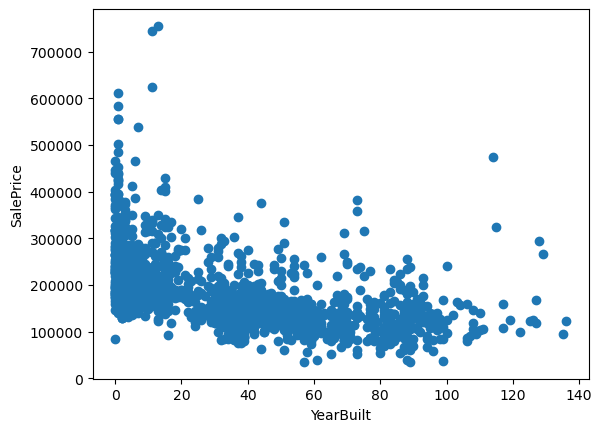

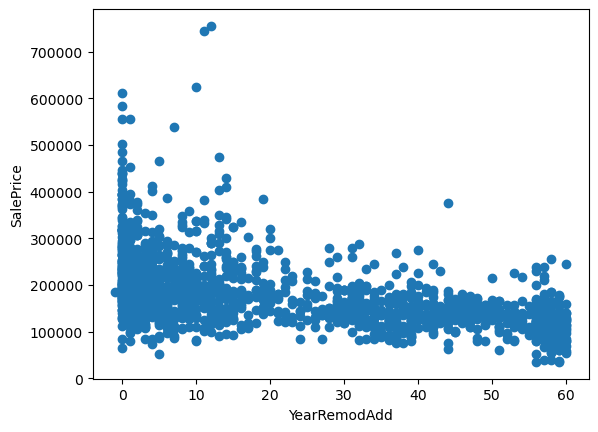

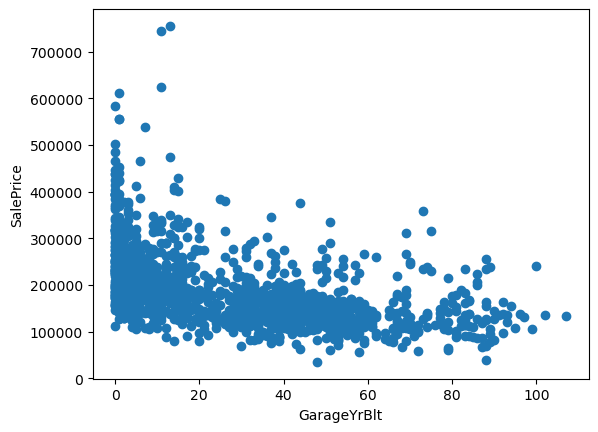

In [14]:
for feature in dt_features:
    if feature!="YrSold":
        data=train.copy()
        data[feature]=data["YrSold"]-data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

## Numerical Variable types:
    1.Discrete Variable
    2.Continuous Variable

### 1.Discrete Variable

In [15]:
discrete_features=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in dt_features+["Id"]]
print("Total Discrete Features:{}".format(len(discrete_features)))

Total Discrete Features:17


In [16]:
train[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

#### Relationship between these discrete features and target feature/variable:SalePrice

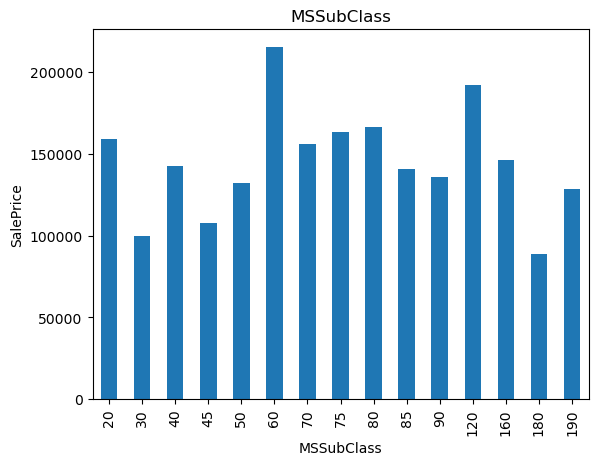

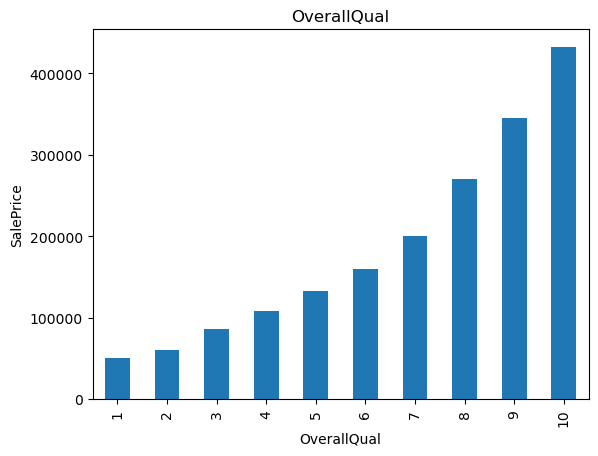

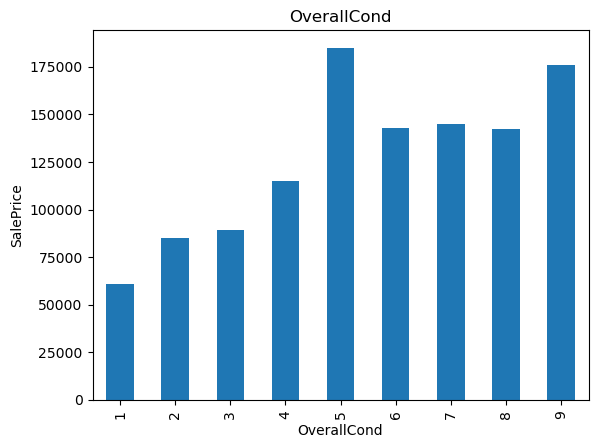

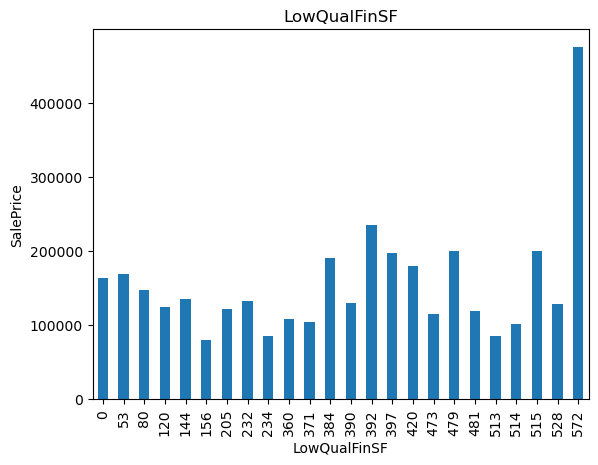

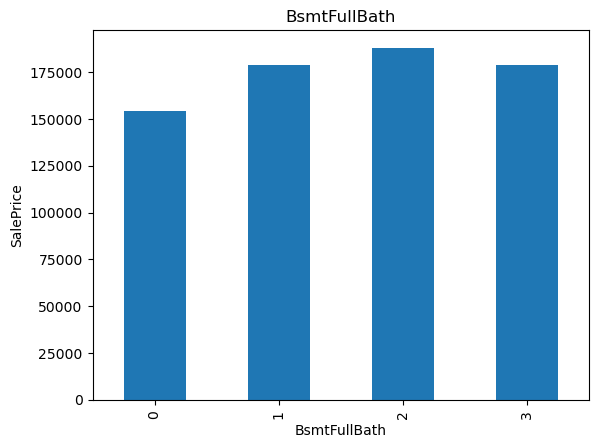

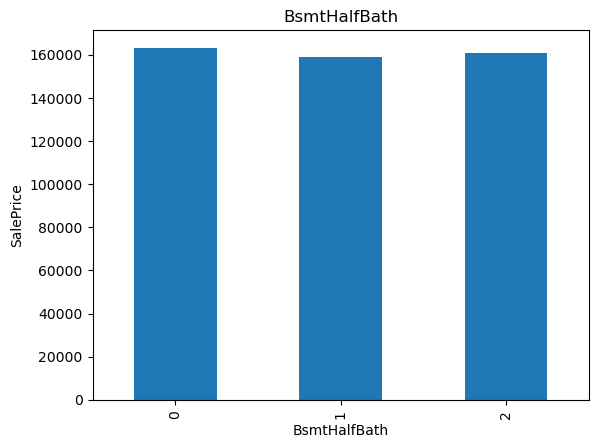

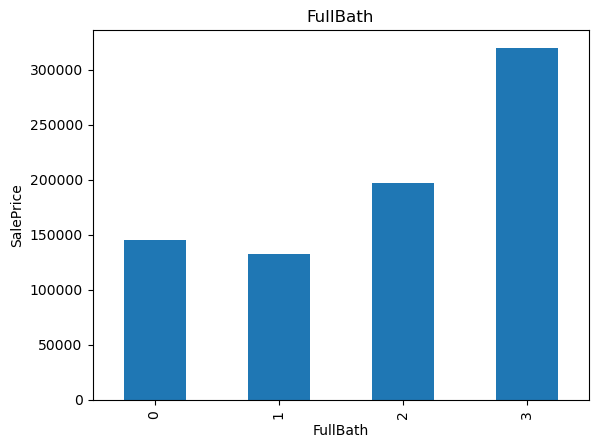

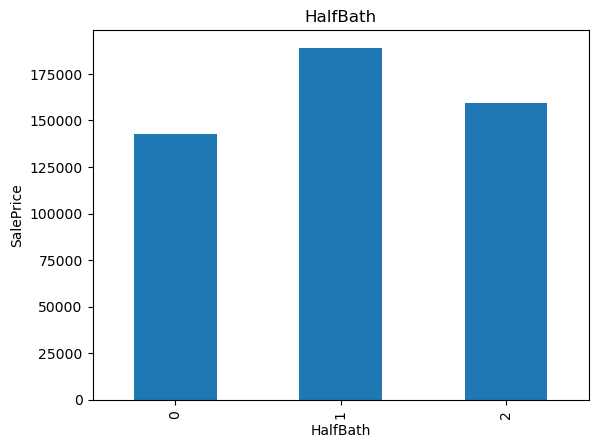

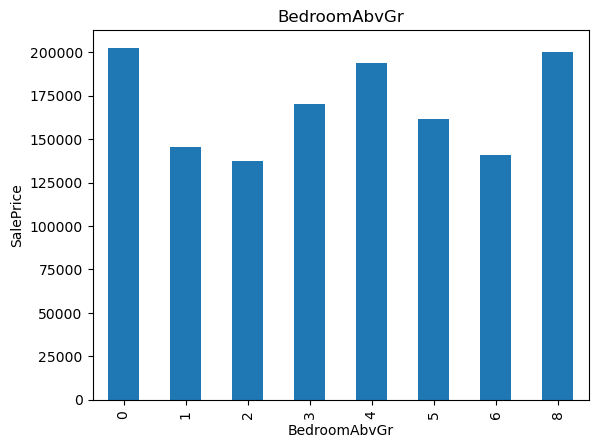

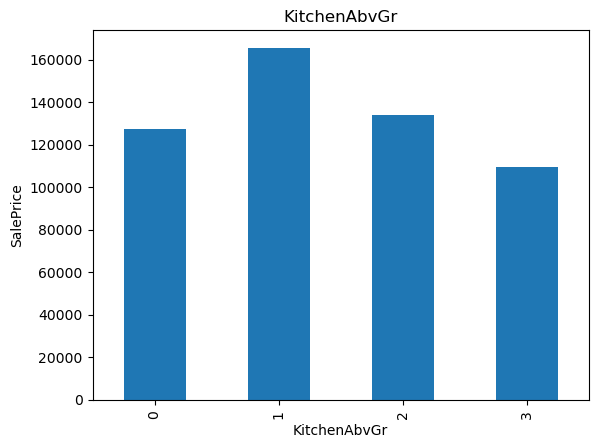

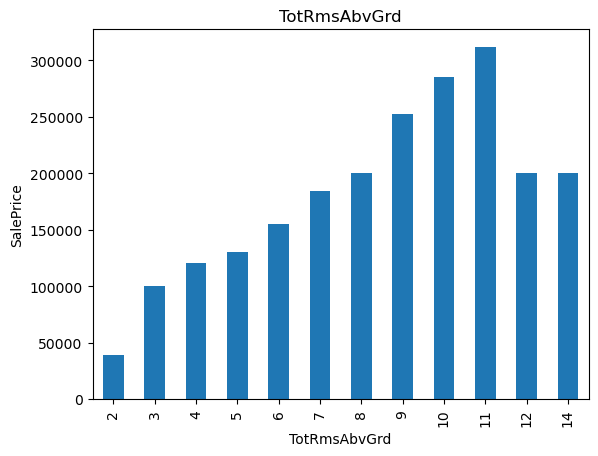

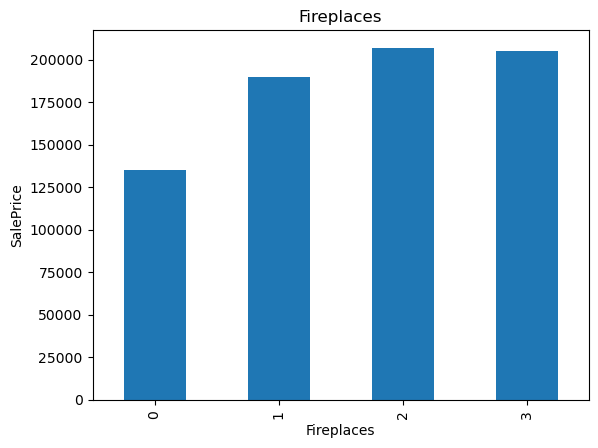

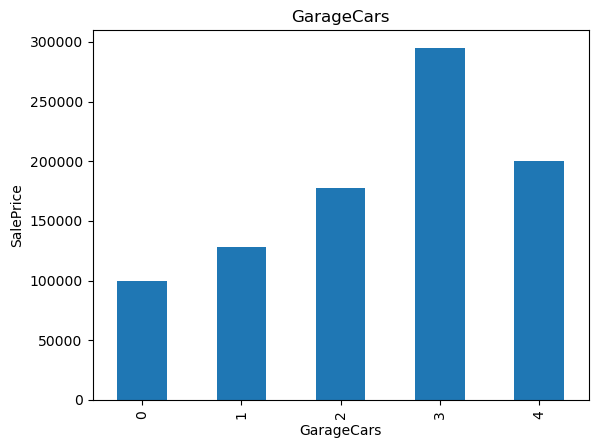

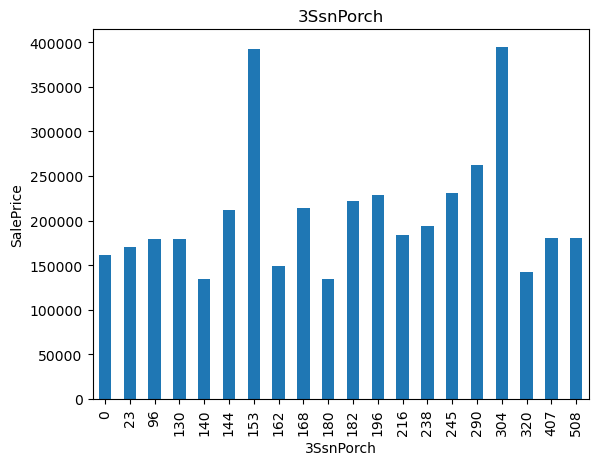

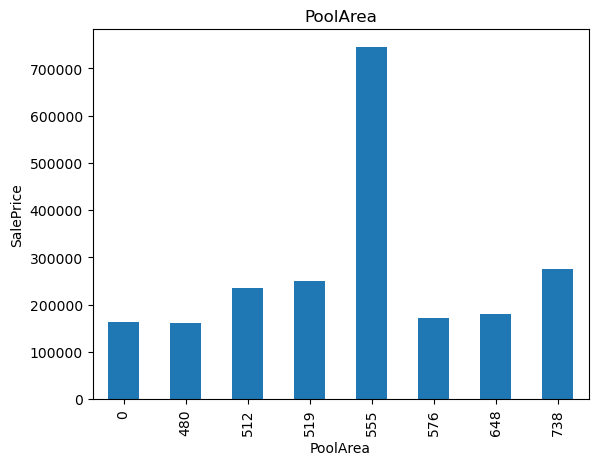

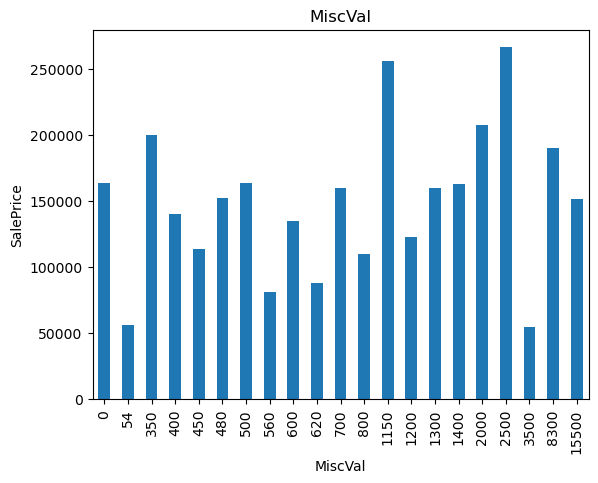

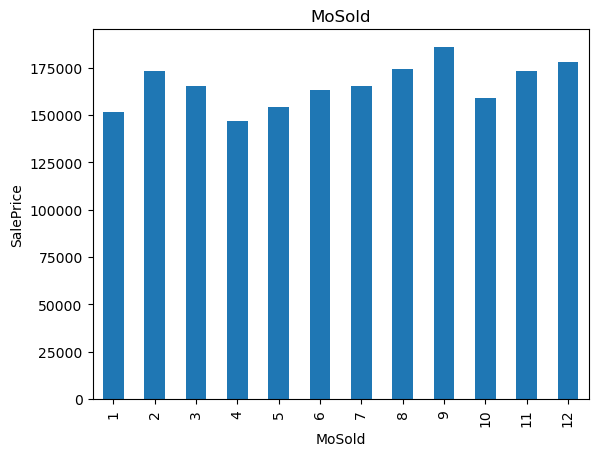

In [17]:
for feature in discrete_features:
    data=train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

### 2.Continuous Variable

In [18]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+dt_features+["Id"]]
print("Total Continuous Features:{}".format(len(continuous_features)))

Total Continuous Features:16


#### visualizing continuous features 

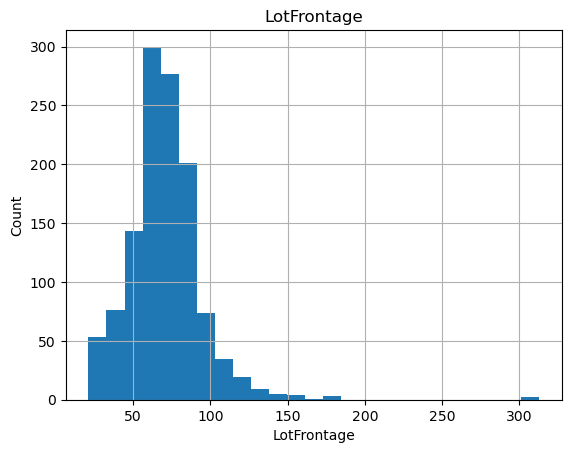

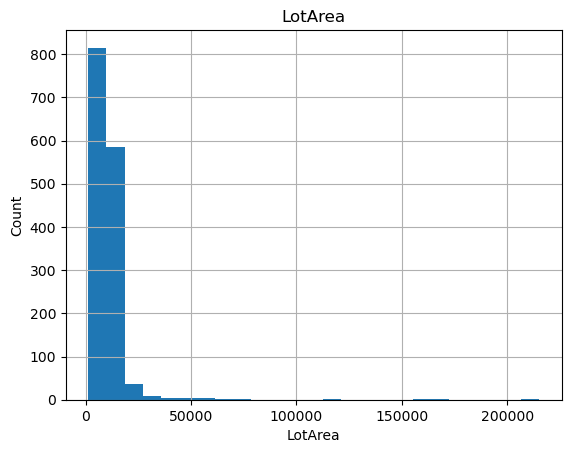

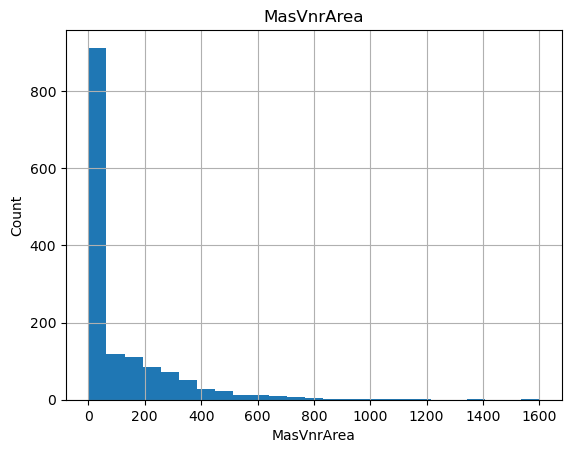

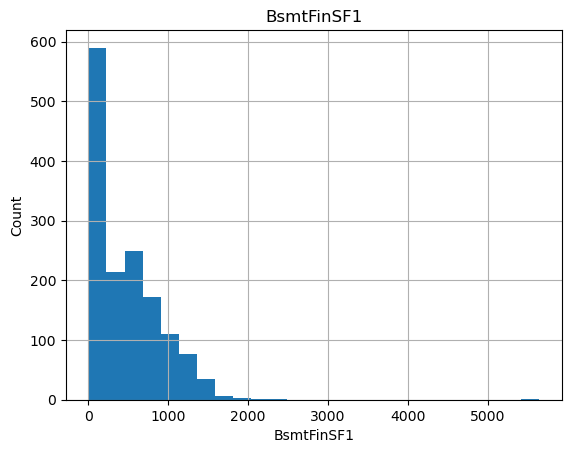

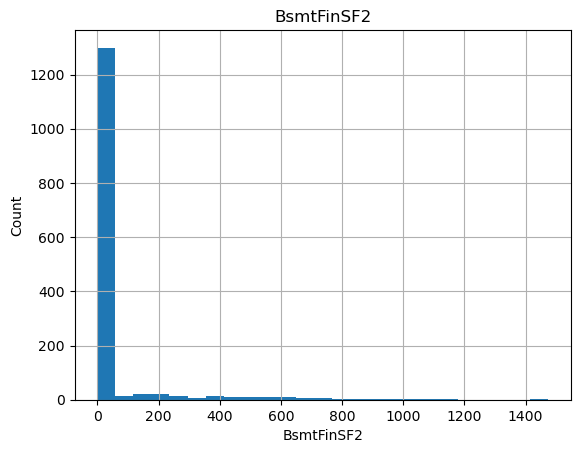

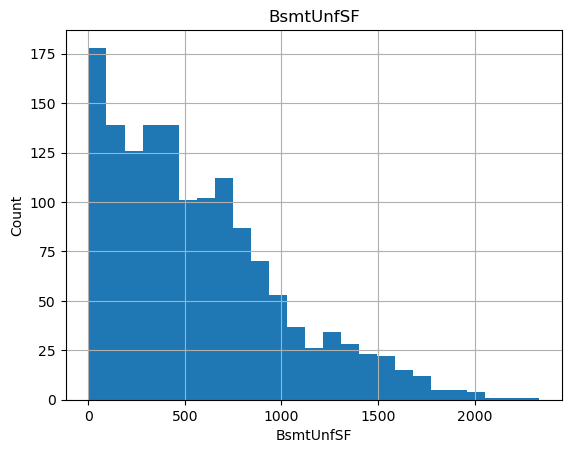

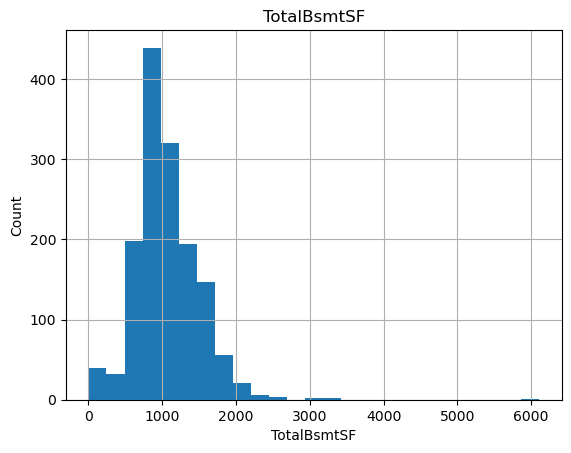

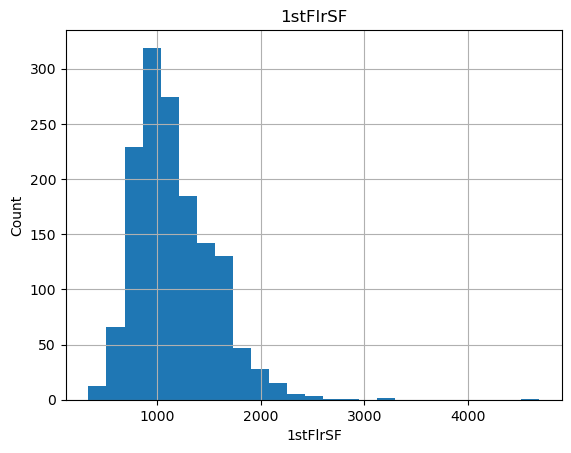

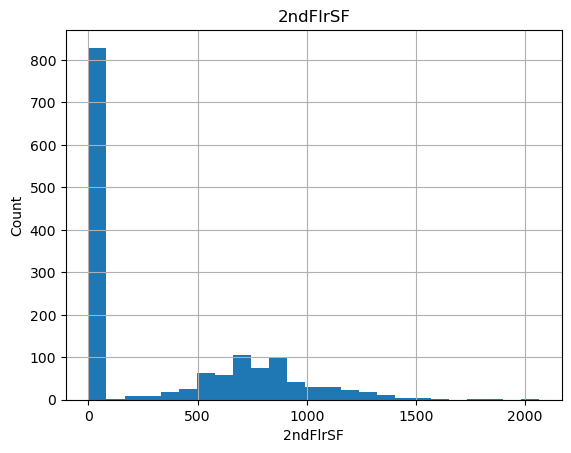

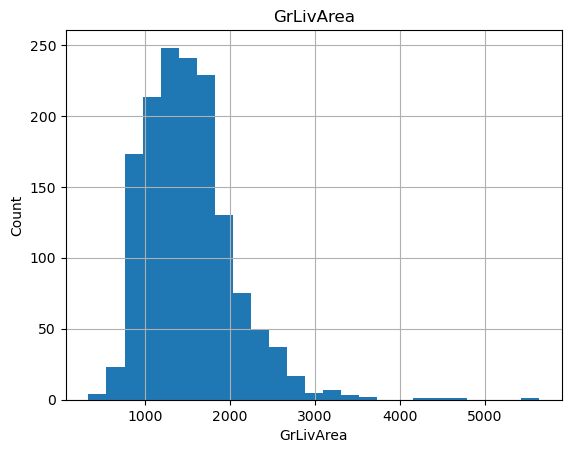

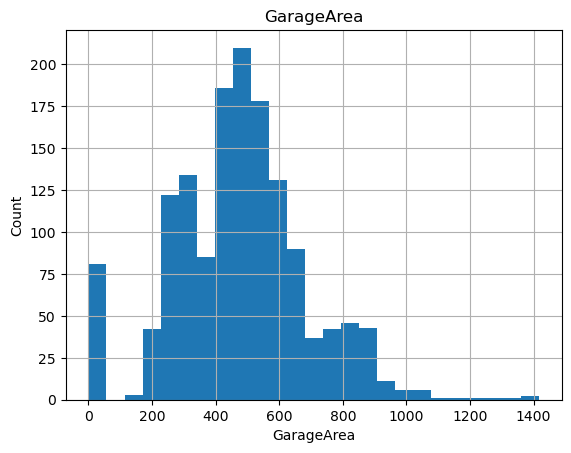

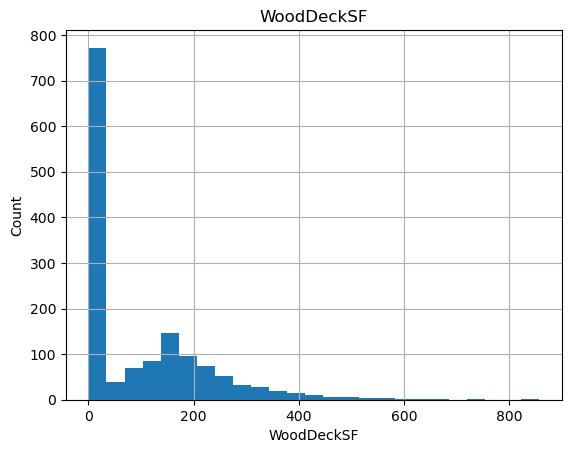

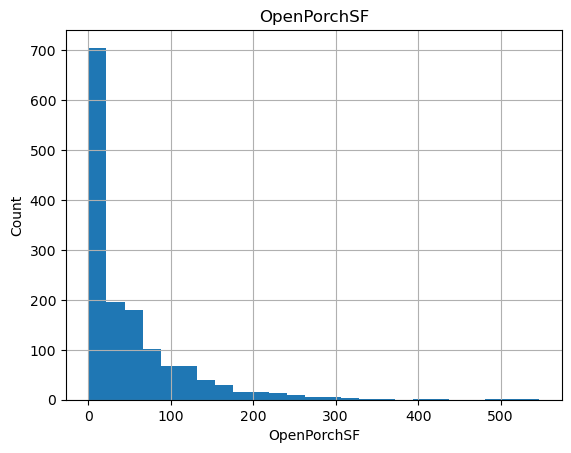

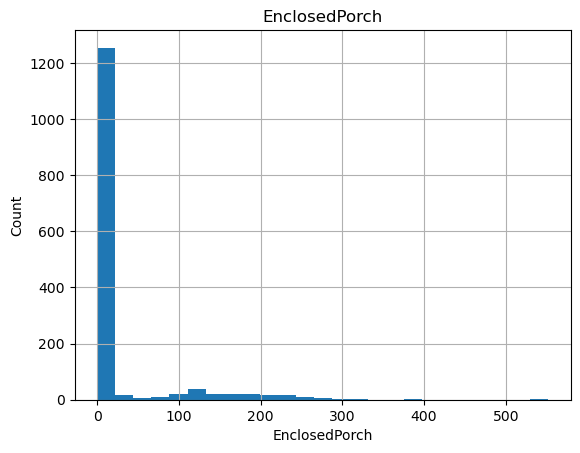

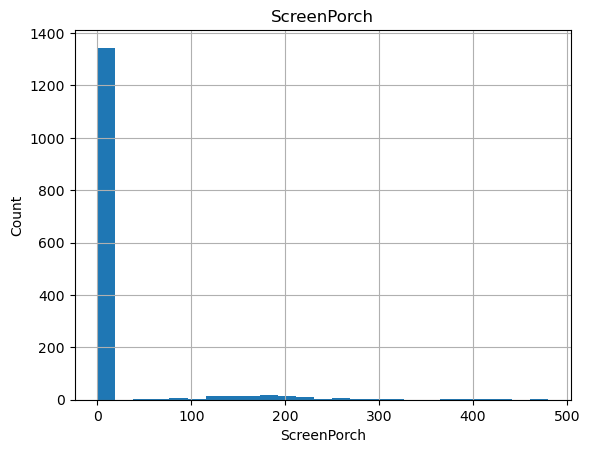

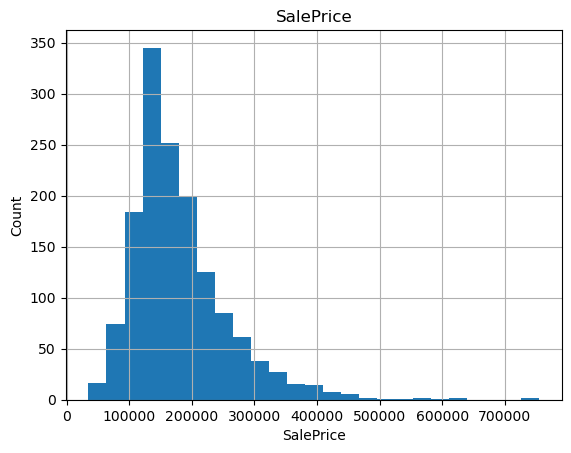

In [19]:
for feature in continuous_features:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Categorical Variables

In [20]:
cat_features=train.select_dtypes(include="object")
cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Visualizing missing values using missingno library for sample of 250

<AxesSubplot:>

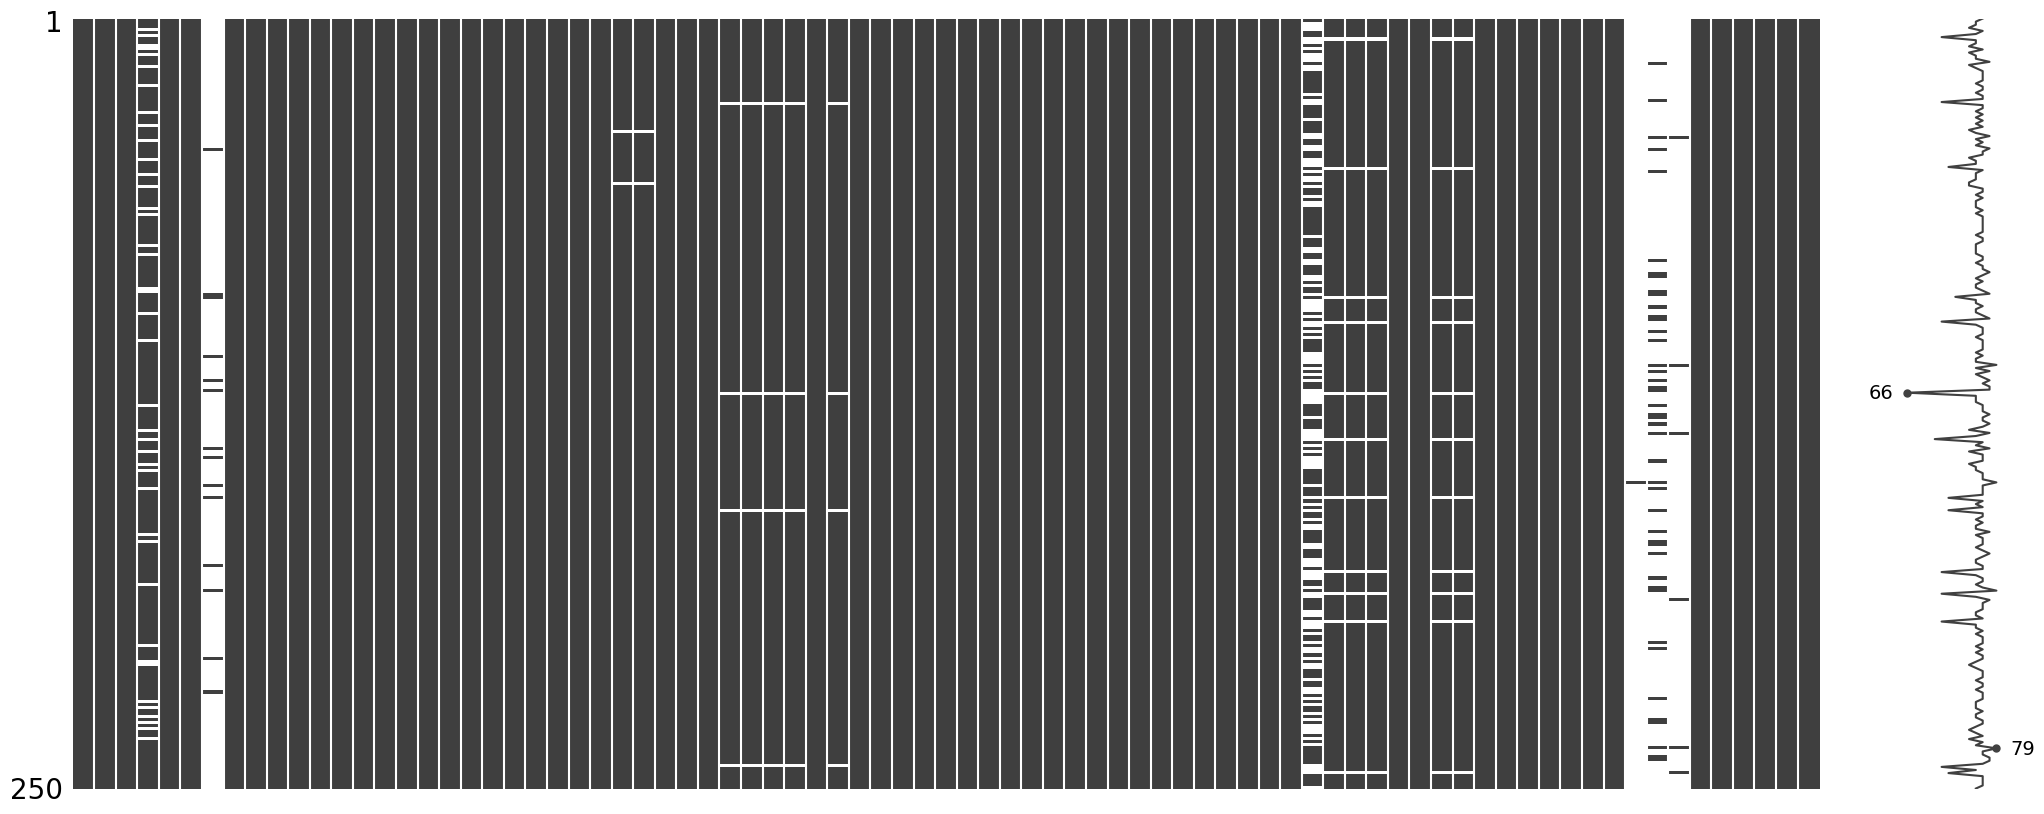

In [21]:
msno.matrix(train.sample(250))

<AxesSubplot:>

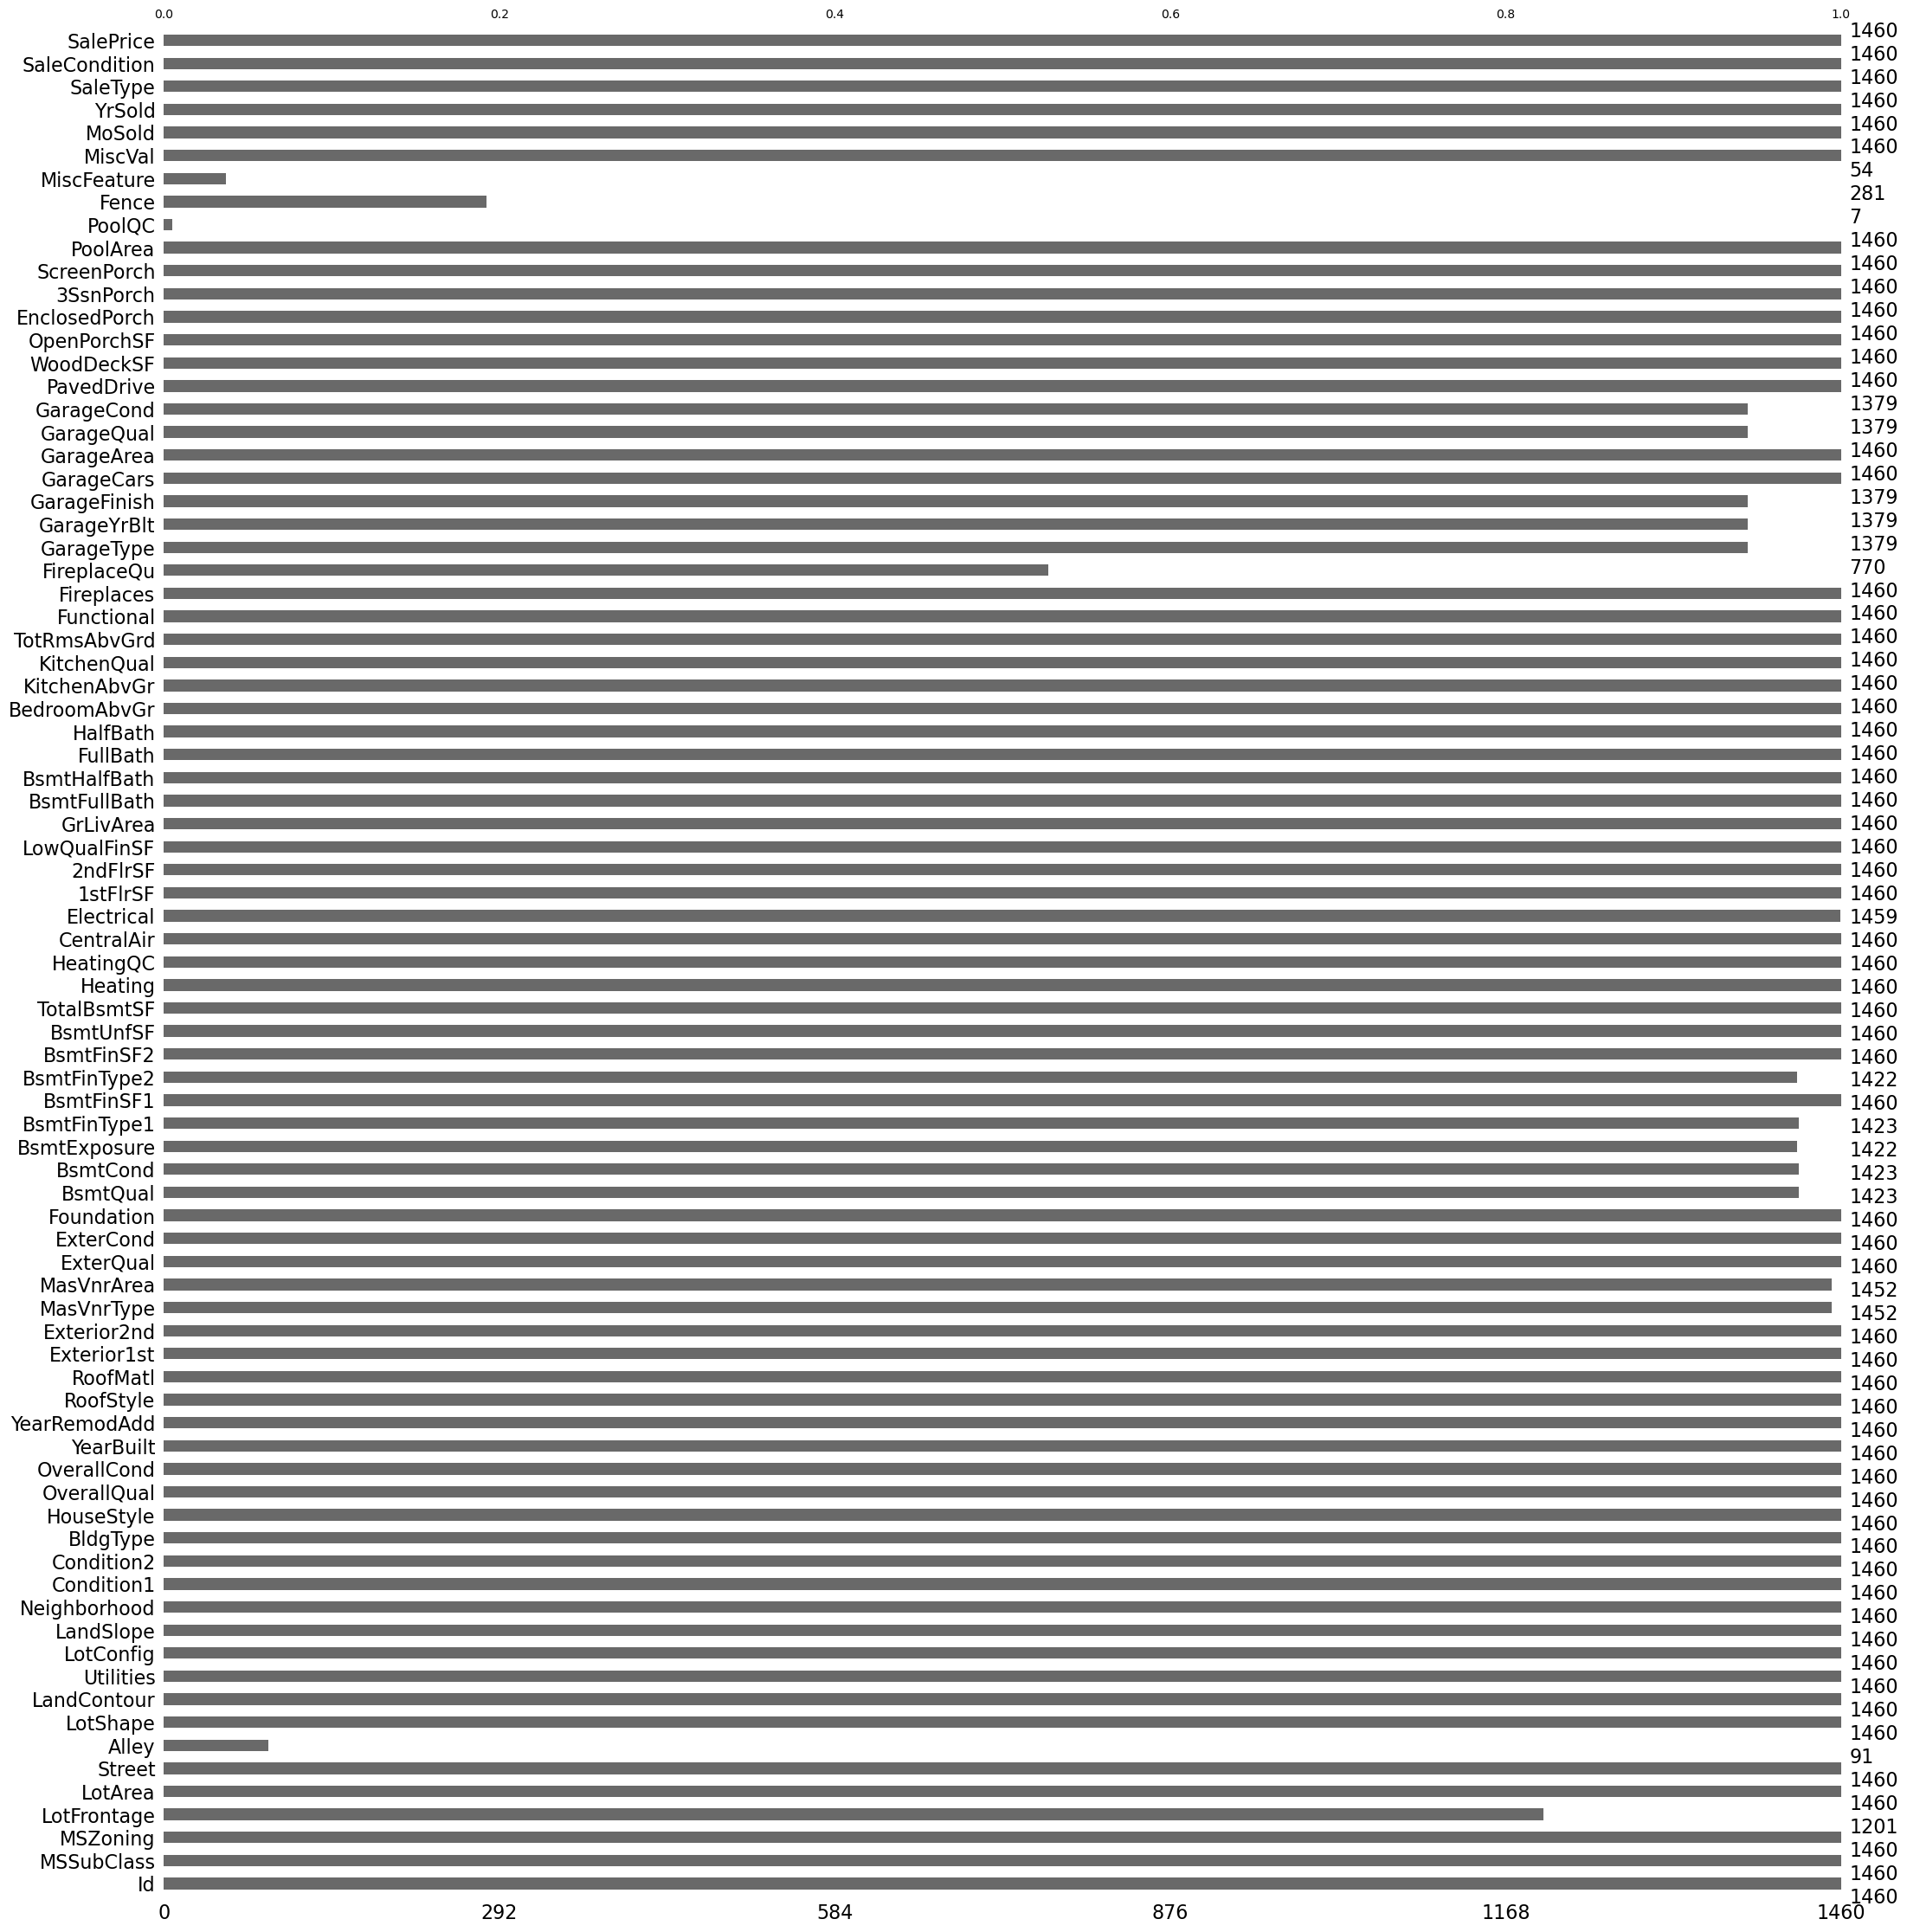

In [22]:
msno.bar(train)

<AxesSubplot:>

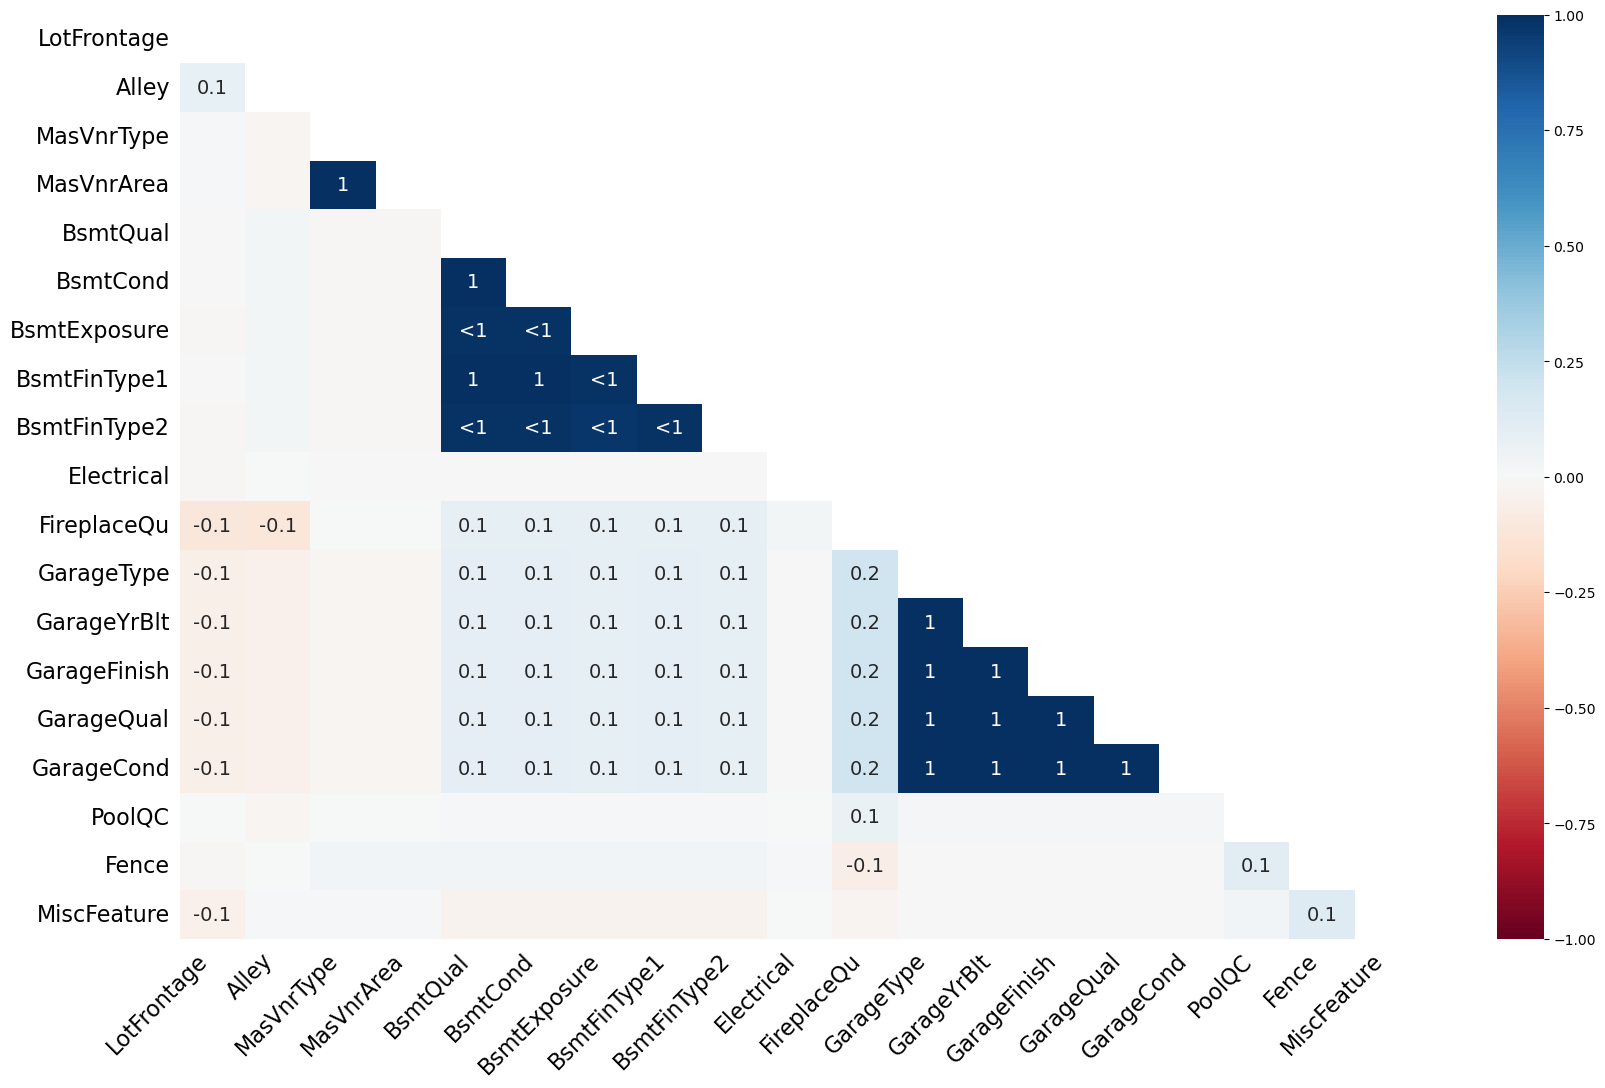

In [23]:
msno.heatmap(train)

<AxesSubplot:>

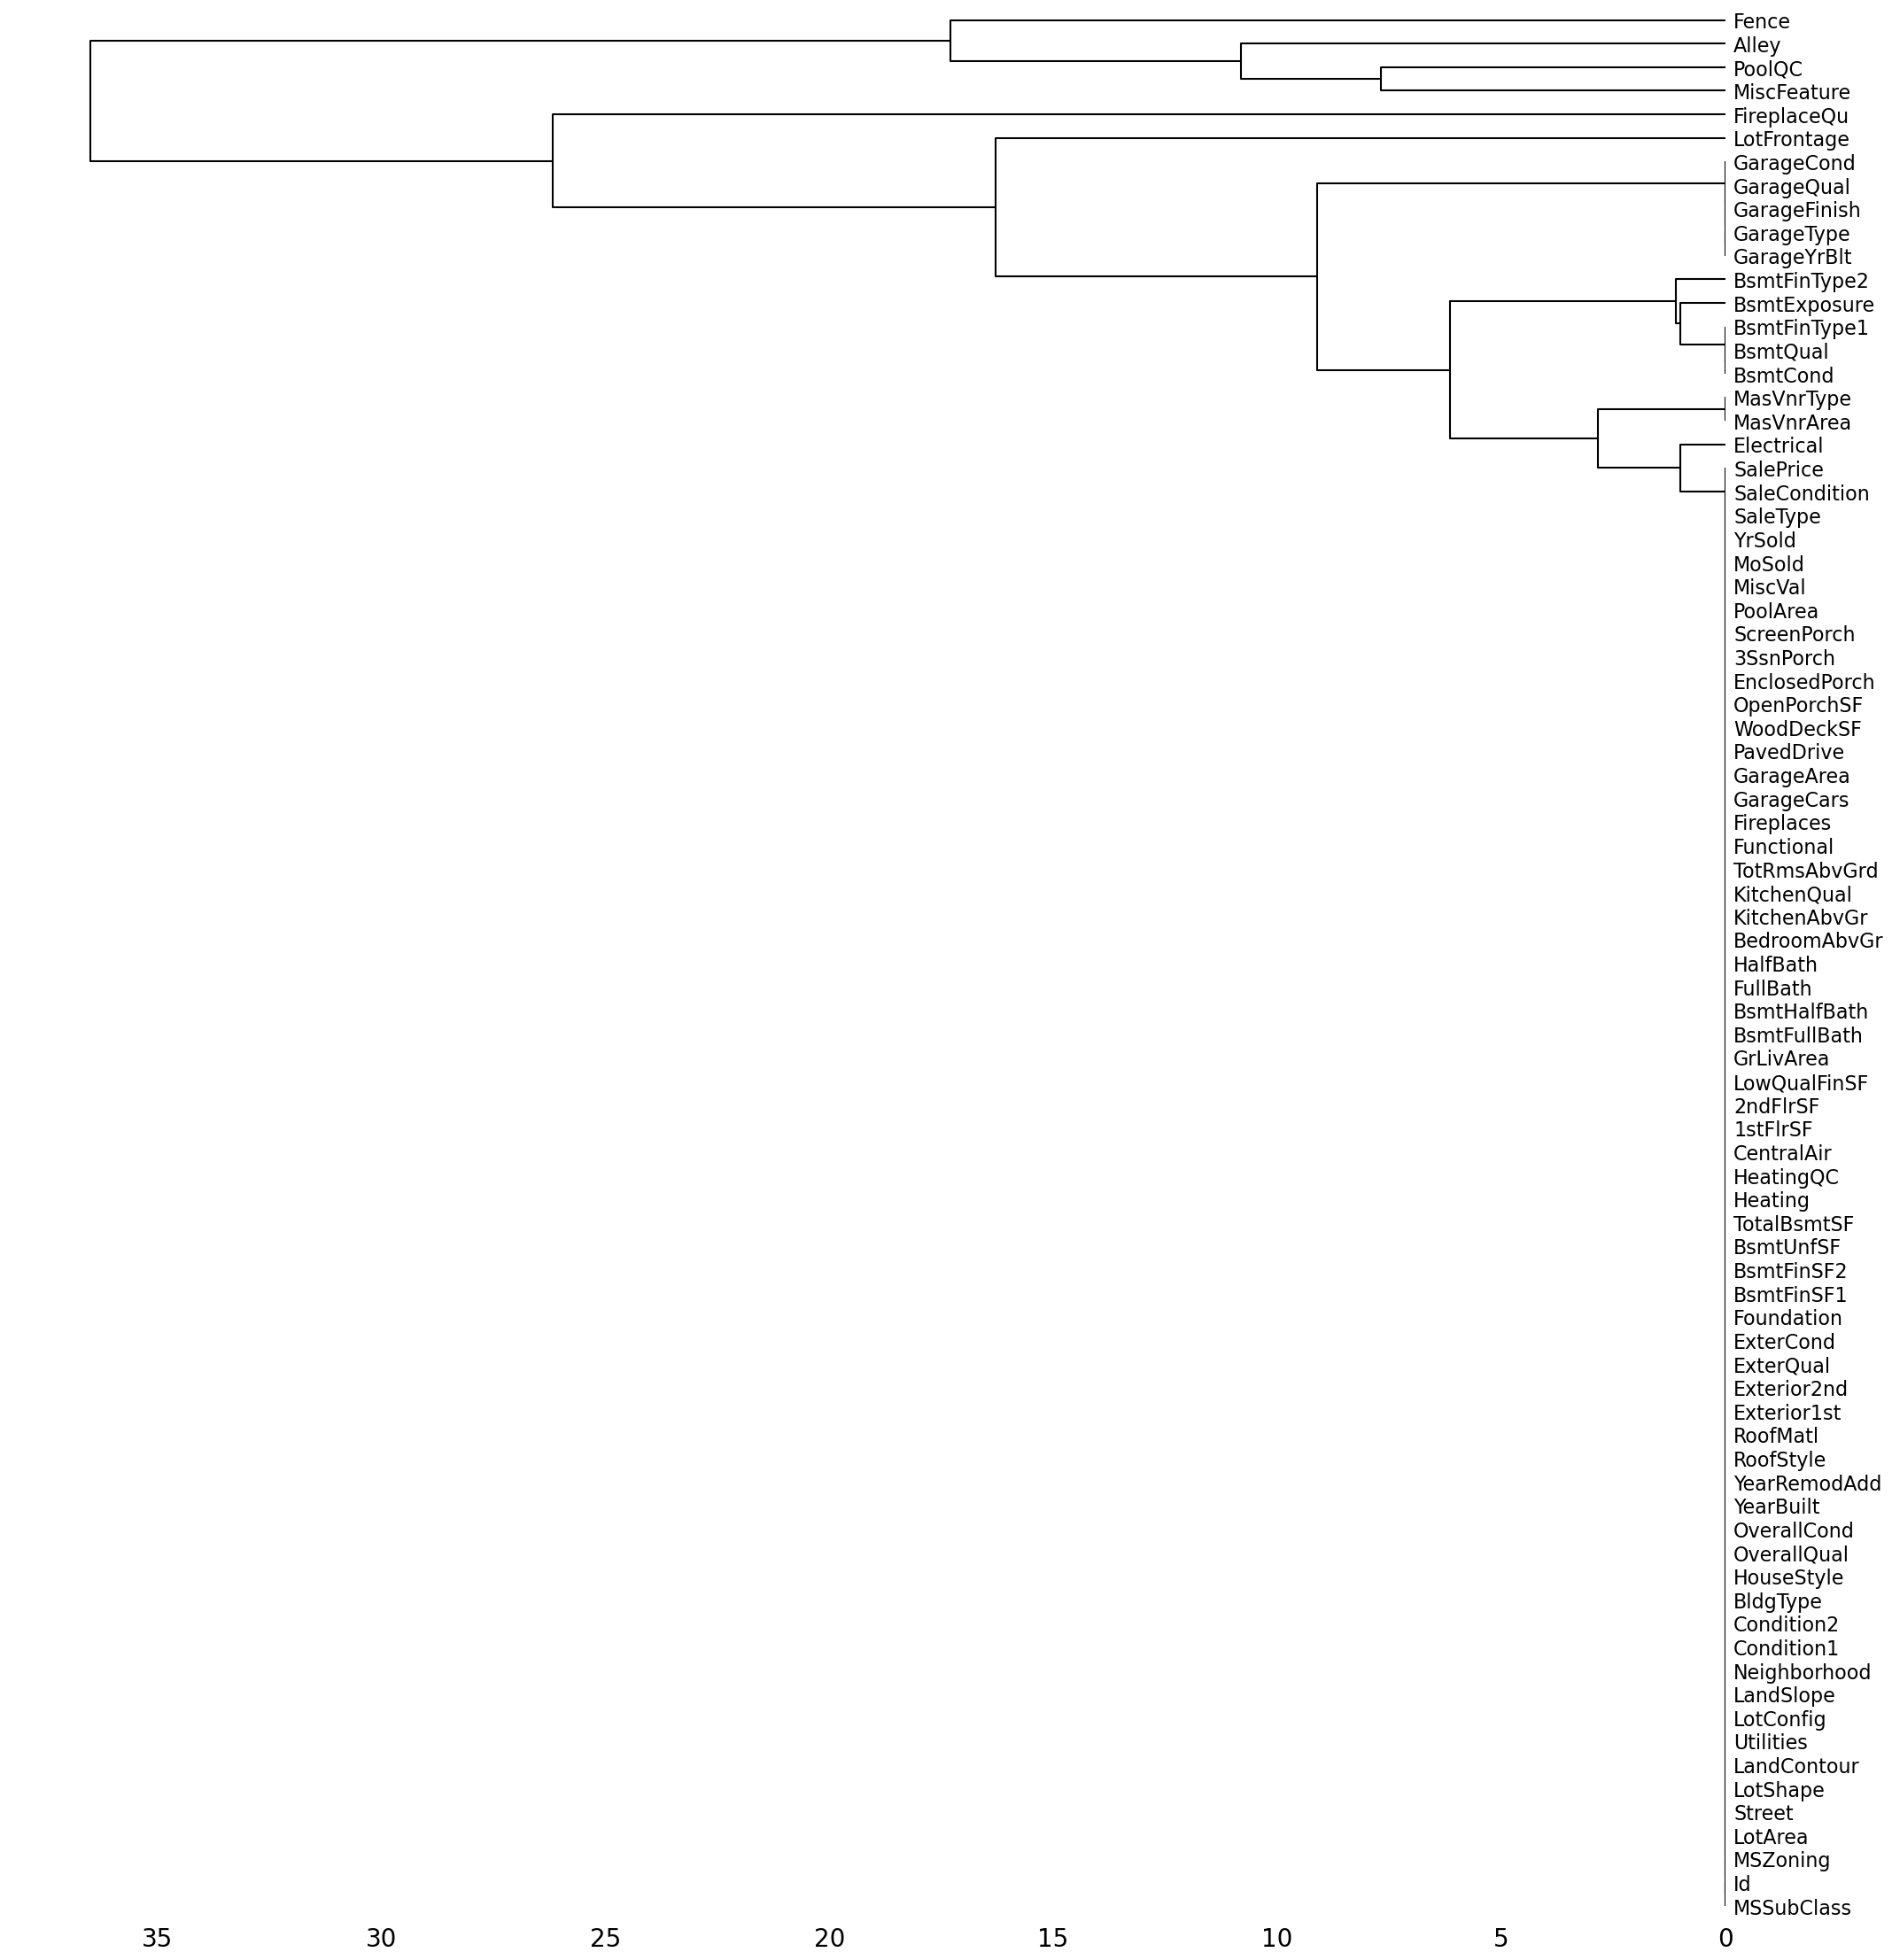

In [24]:
msno.dendrogram(train)

In [25]:
#Here we can see a lot missing values in our dataset
#to deal with it we use different methods like imputing with mean,median,mode depending upon type of variable(categorical or numerical)
#depending upon conditions like ,is this feataure useful(eg: if >20% are missing and not useful drop it)
#can interpolate using different methods like linear,ffill,bfill,....
#and many more

## Estimating skewness and Kurtosis

### skewness tells us if our data is symmetric or not 
     1.skewness=0  means symmetric
     2.skewness<0 means negatively skewed,i.e,left skewed
     3.skewness>0 means positively skewed,i.e,right skewed 

In [26]:
train.skew()

C:\Users\sudha\AppData\Local\Temp\ipykernel_12668\3574648760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

### Kurtosis tells us if our data is above normal distribution bell shaped curve or below or same
     1.kurtosis=3 means Normal Dist.
     2.kurtosis>3 means above it
     3.kurtosis<3 means below it

In [27]:
train.kurt()

C:\Users\sudha\AppData\Local\Temp\ipykernel_12668\3954909123.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.kurt()


Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

## target variable dist. visualization
    Since target variable is a continuous variable

C:\Users\sudha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'LogNormal'}, xlabel='SalePrice'>

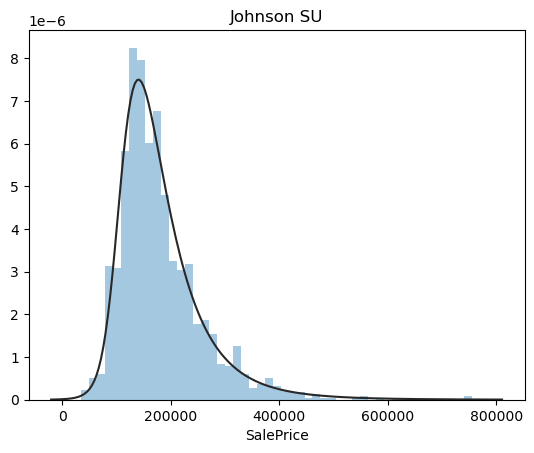

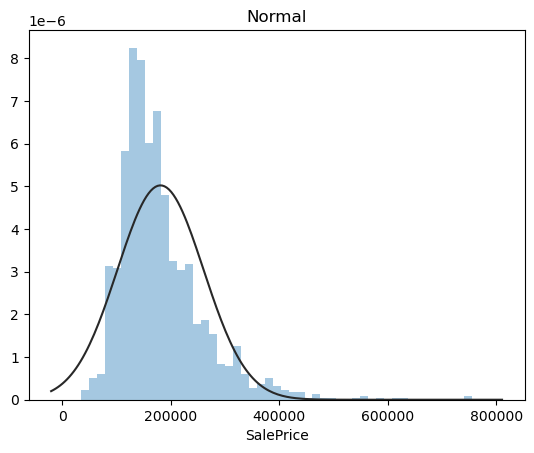

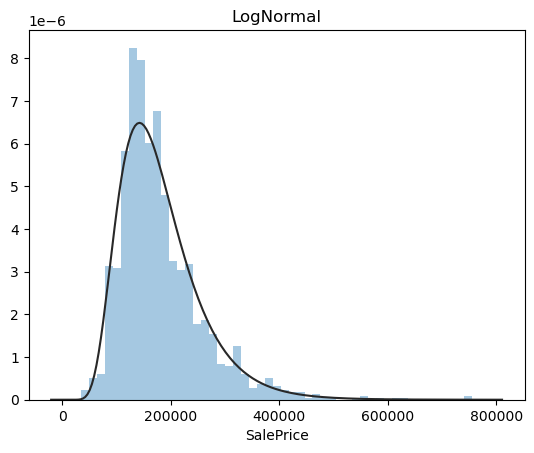

In [28]:
y=train["SalePrice"]
plt.figure(1)
plt.title("Johnson SU")
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2)
plt.title("Normal")
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3)
plt.title("LogNormal")
sns.distplot(y,kde=False,fit=st.lognorm)

In [29]:
#we can see above our target variable is not following normal dist.
#while lognormal is doing well and johnsonsu is best fit
#since its not following normal distribution,so we need to transform it before applying regresion 

C:\Users\sudha\AppData\Local\Temp\ipykernel_12668\749570210.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(train.skew(),axlabel="Skewness",color='blue')


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

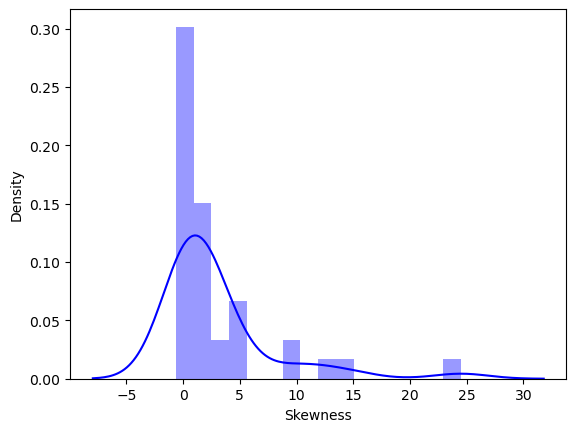

In [30]:
sns.distplot(train.skew(),axlabel="Skewness",color='blue')

C:\Users\sudha\AppData\Local\Temp\ipykernel_12668\1494013464.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(train.kurt(),axlabel="Kurtosis",color='red')
C:\Users\sudha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


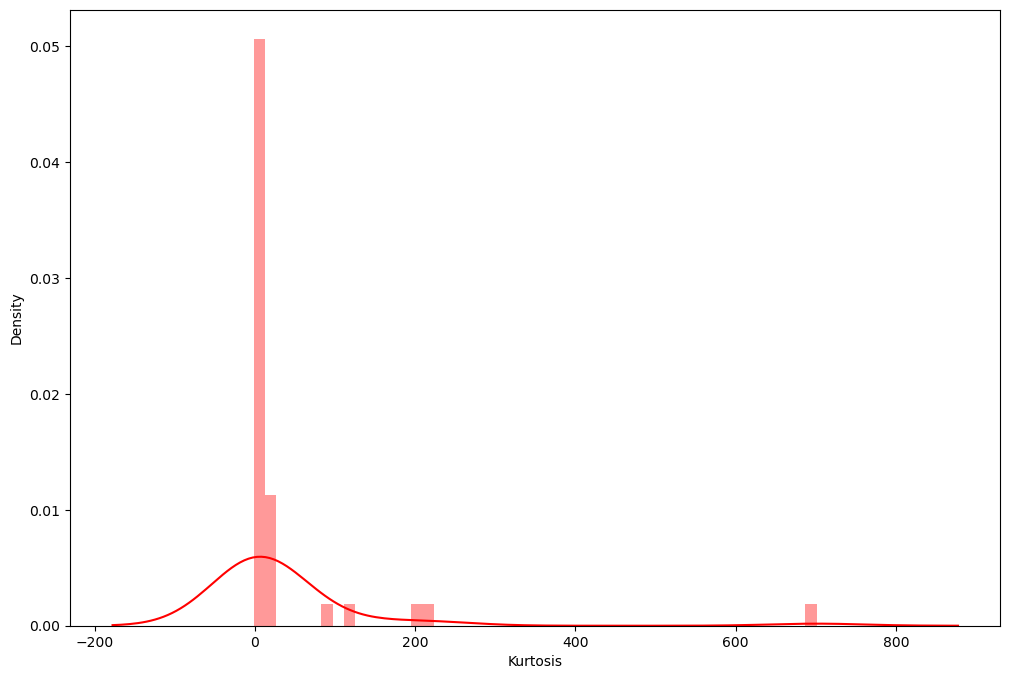

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(train.kurt(),axlabel="Kurtosis",color='red')
plt.show()

## visualization of target variable transformation

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

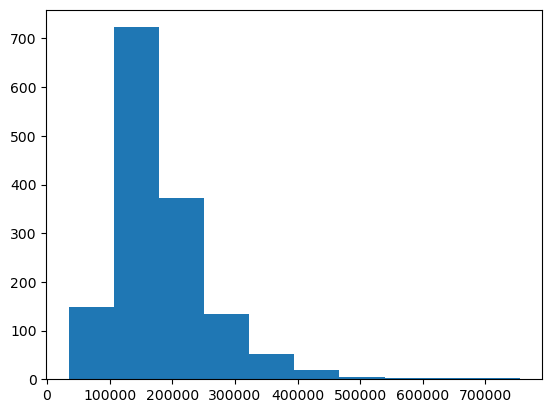

In [32]:
target=train["SalePrice"]
plt.hist(target)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

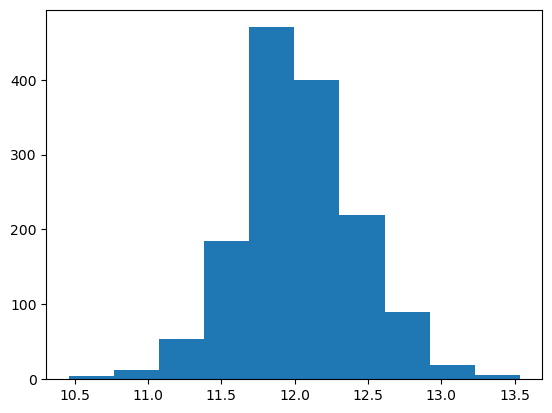

In [33]:
target=np.log(train["SalePrice"])
plt.hist(target)

## Checking Correlation between numeric features and target variable(SalePrice)

In [34]:
corr=numerical_features.corr()
corr

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [35]:
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### for further exploration we can use different visuals

<AxesSubplot:>

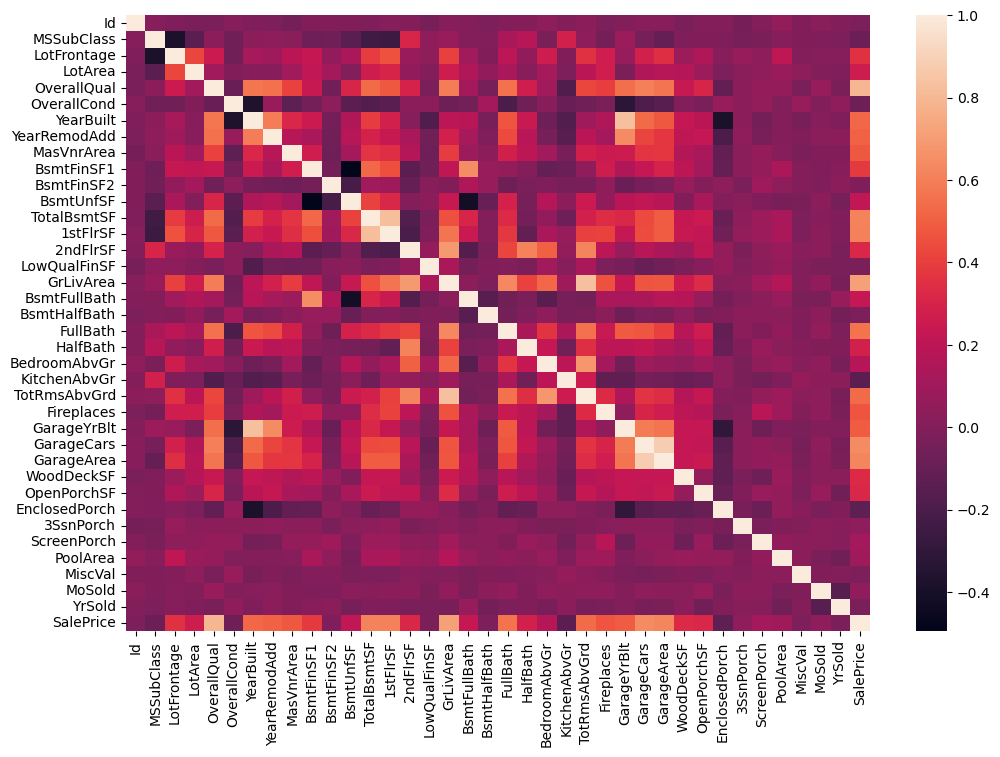

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(corr)

In [37]:
cols=corr.nlargest(11,"SalePrice")["SalePrice"].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

<AxesSubplot:>

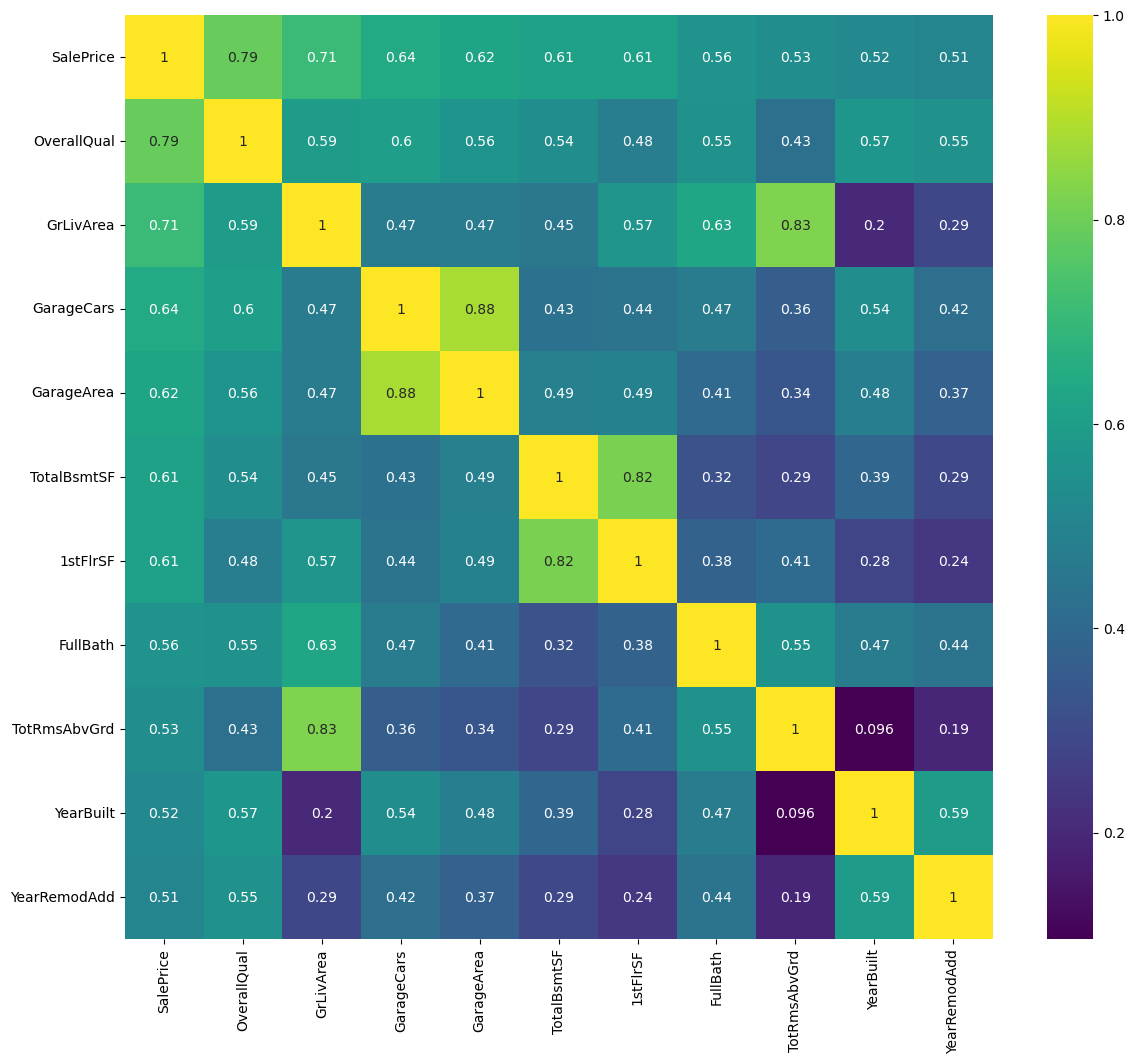

In [38]:
cm=train[cols].corr()
plt.figure(figsize=(14,12))
sns.heatmap(cm,annot=True,cmap="viridis")

C:\Users\sudha\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


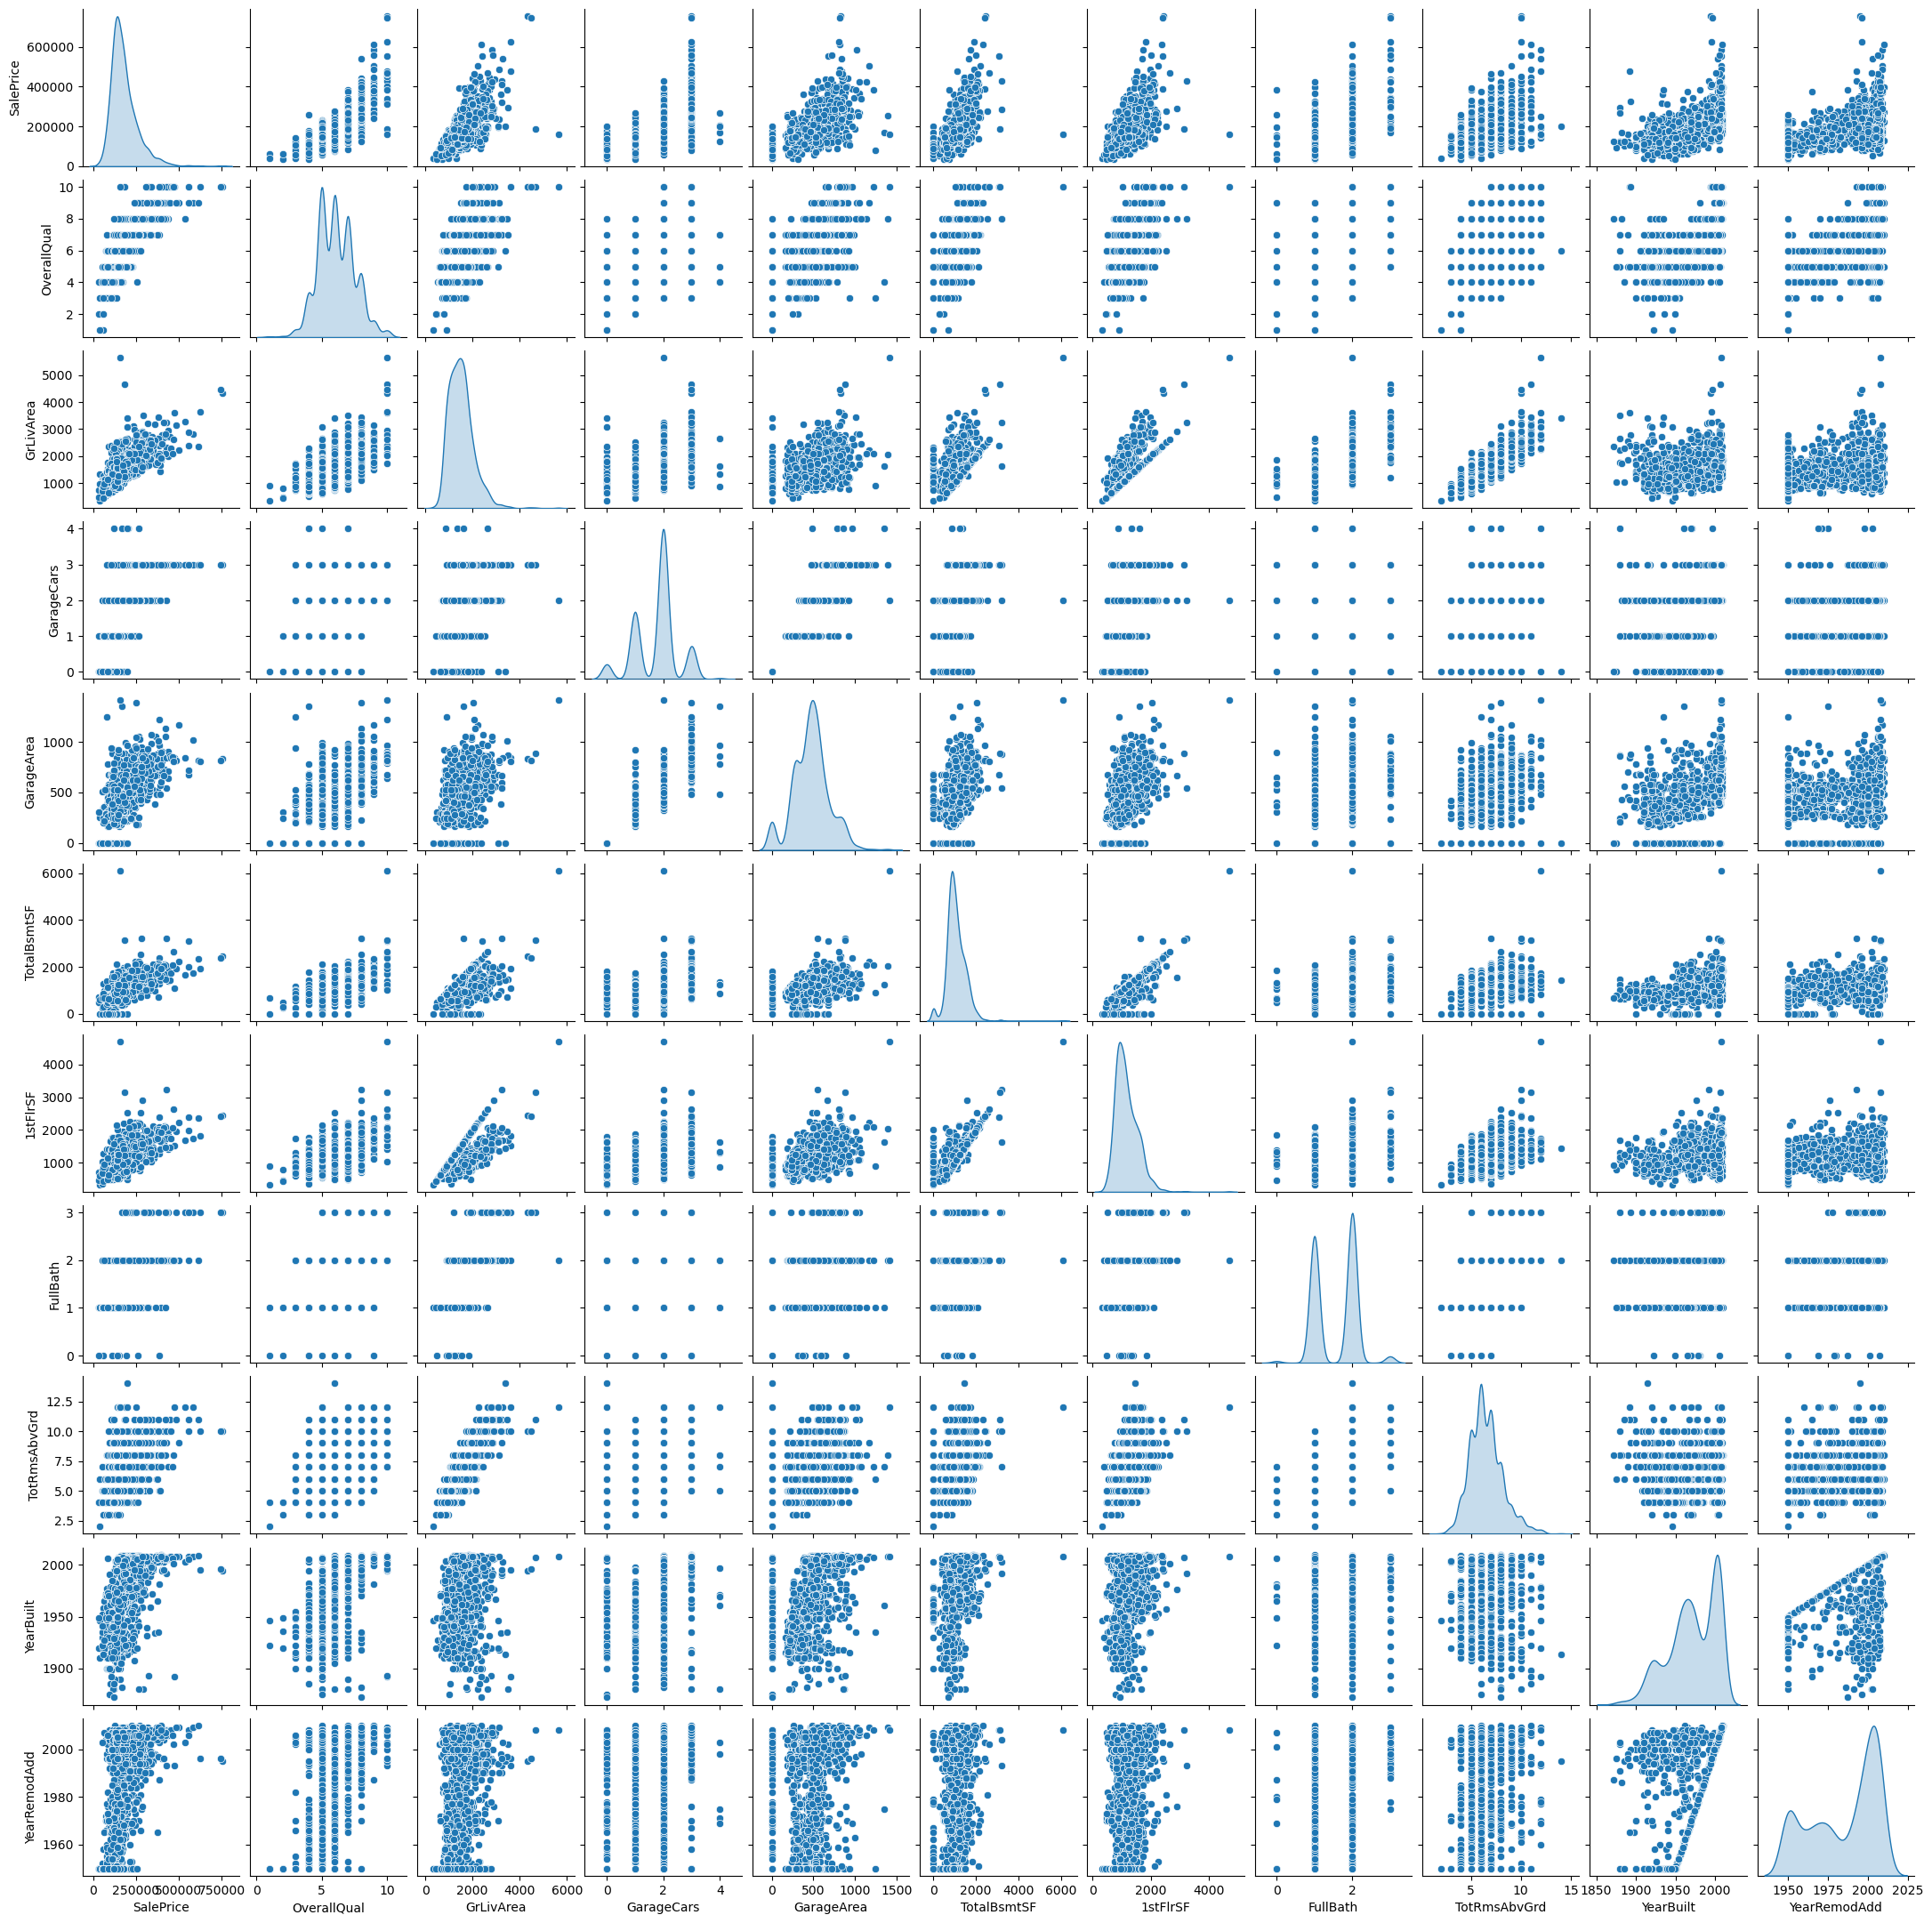

In [39]:
sns.pairplot(train[cols],size=2,kind='scatter',diag_kind='kde')

### scatter plot of most correlated variables with target variable

C:\Users\sudha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


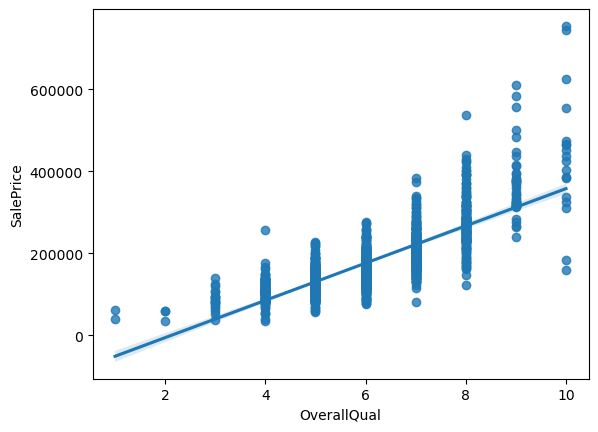

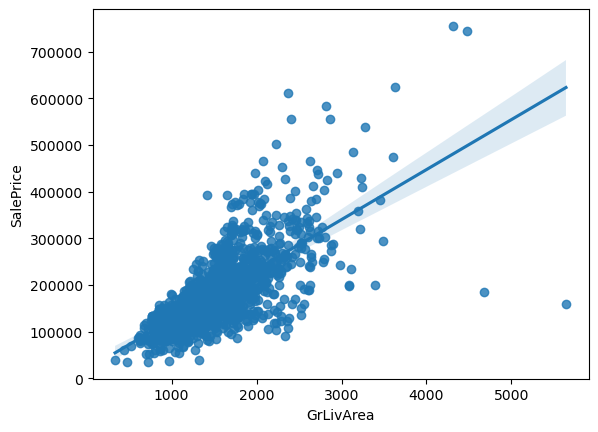

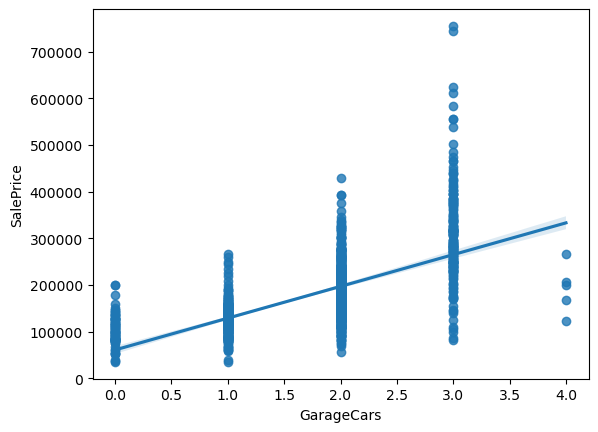

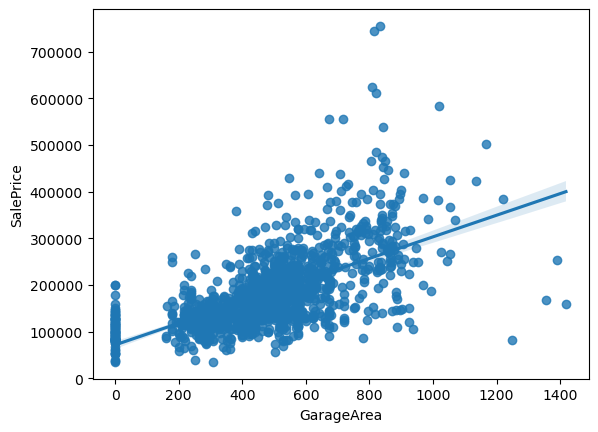

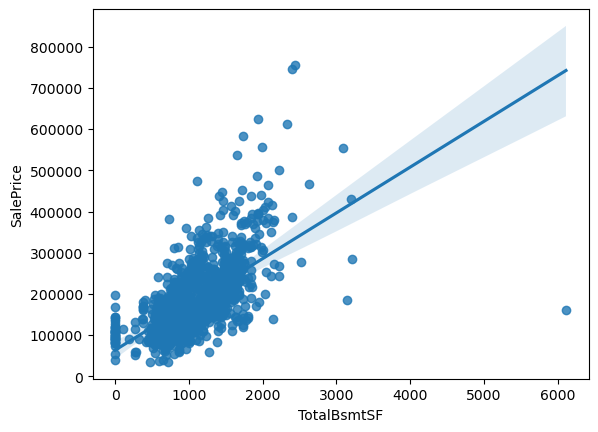

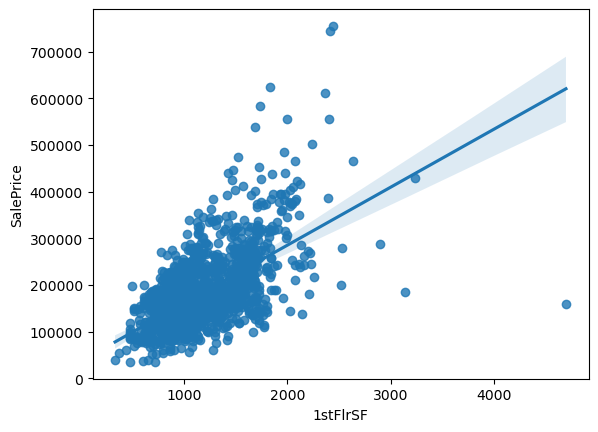

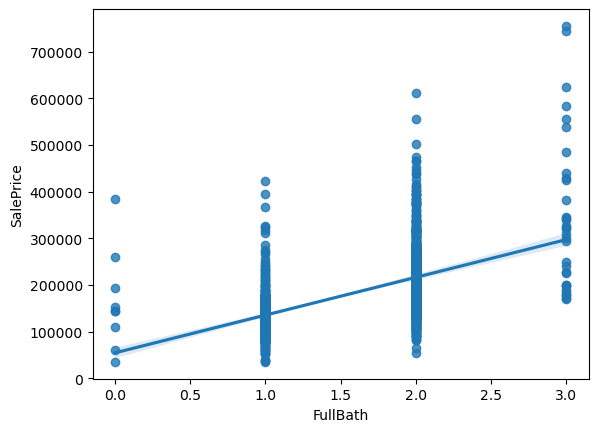

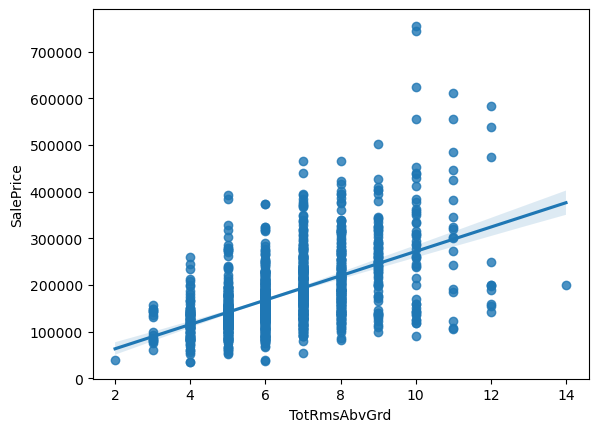

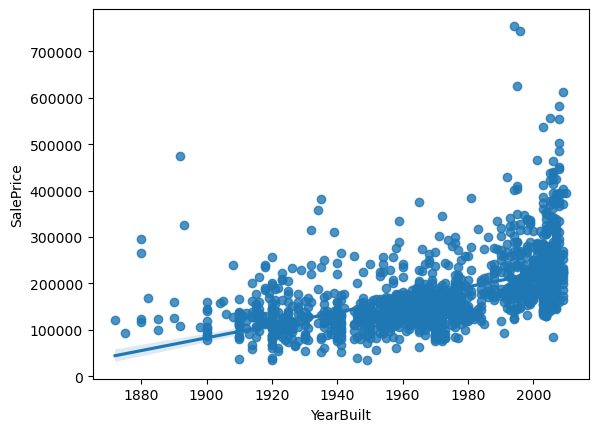

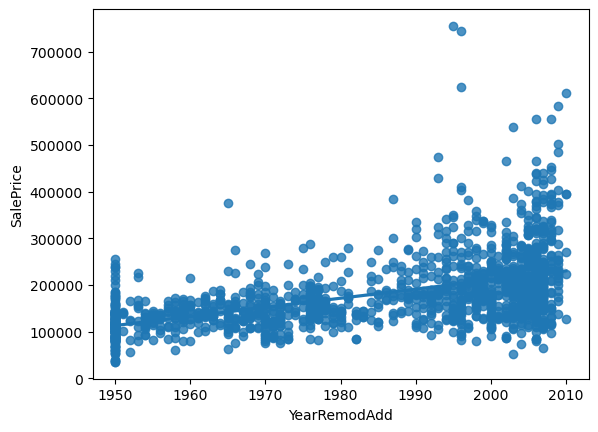

In [40]:
for feature in cols:
    if feature!='SalePrice':
        sns.regplot(train[feature],train["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### checking overall quality vs median saleprice

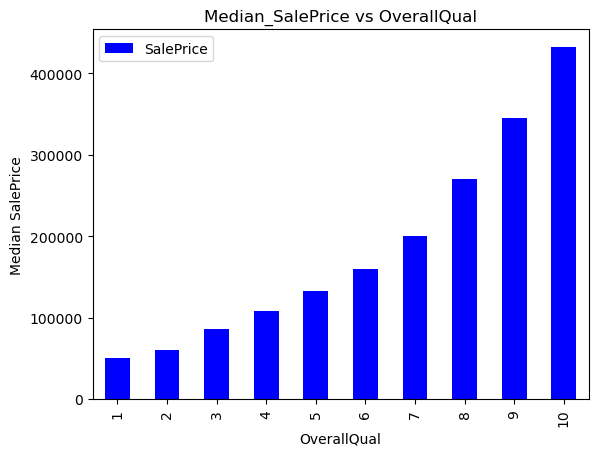

In [41]:
saleprice_overall_qual=train.pivot_table(index="OverallQual",values="SalePrice",aggfunc=np.median)
saleprice_overall_qual.plot(kind="bar",color="blue")
plt.xlabel("OverallQual")
plt.ylabel("Median SalePrice")
plt.title("Median_SalePrice vs OverallQual")
plt.show()

### Boxplot of OverallQual

(-0.5, 9.5, 0.0, 800000.0)

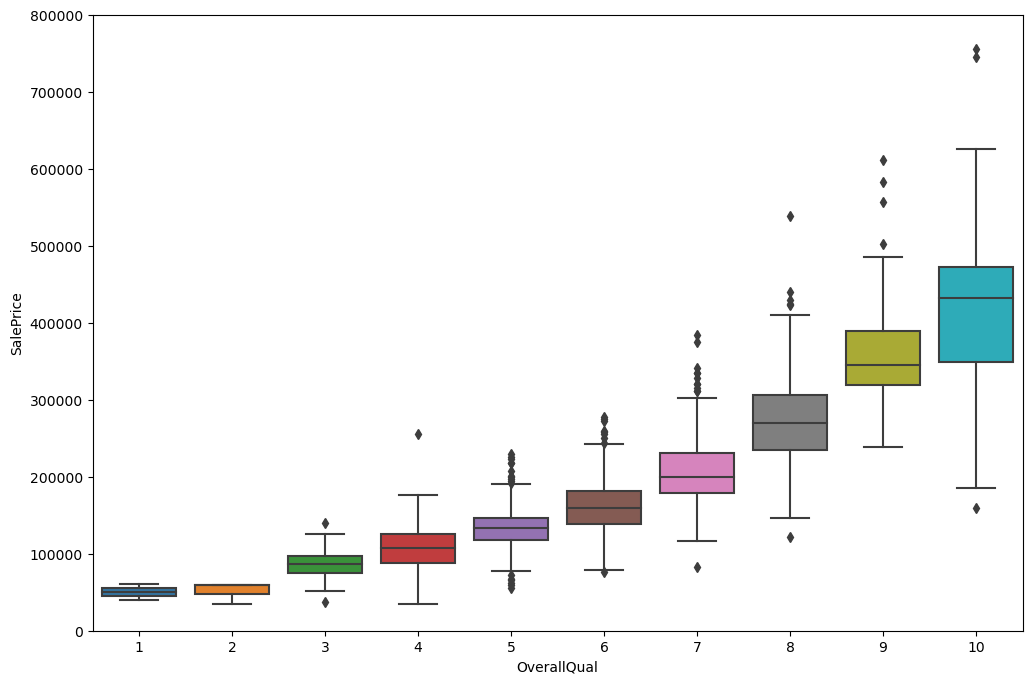

In [42]:
data=pd.concat([train["SalePrice"],train["OverallQual"]],axis=1)
plt.figure(figsize=(12,8))
sns.boxplot(data=data,x="OverallQual",y="SalePrice")
plt.axis(ymin=0,ymax=800000)

### Boxplot of Neighbourhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

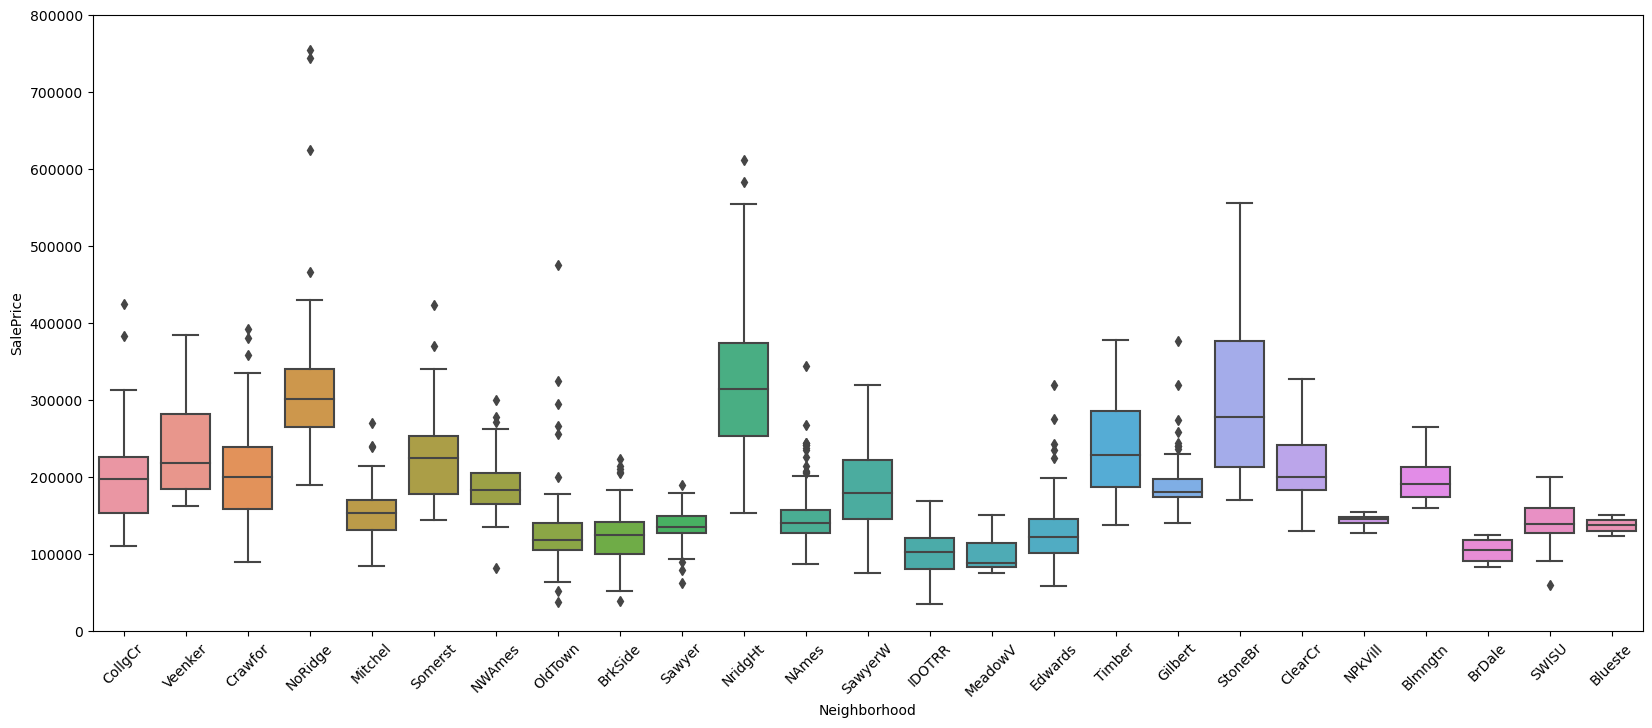

In [43]:
data=pd.concat([train["SalePrice"],train["Neighborhood"]],axis=1)
plt.figure(figsize=(20,8))
sns.boxplot(data=data,x="Neighborhood",y="SalePrice")
plt.axis(ymin=0,ymax=800000)
plt.xticks(rotation=45)

### CountPlot of Neighborhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

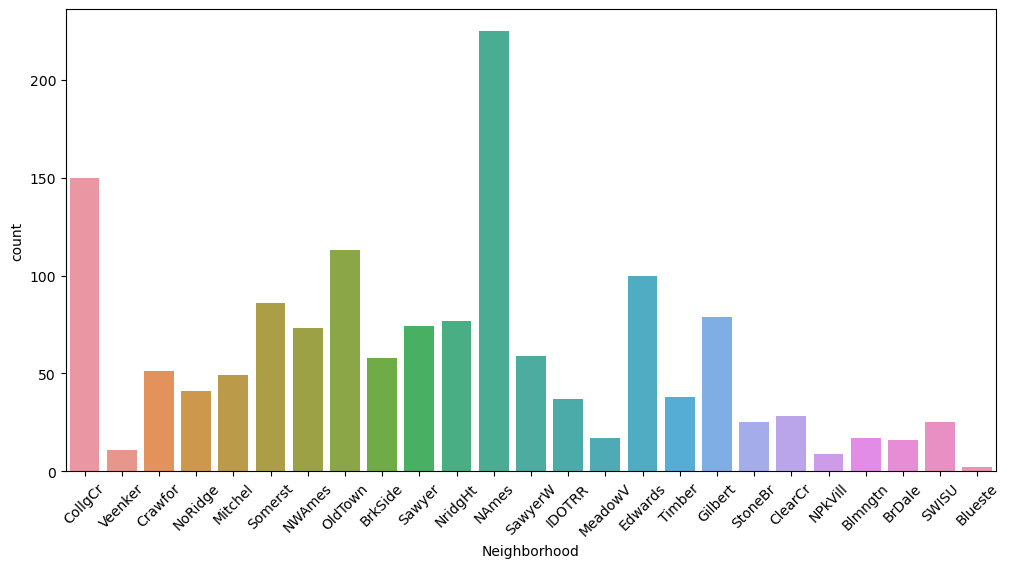

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x="Neighborhood")
plt.xticks(rotation=45)

In [45]:
#from above we can group neighborhood having same saleprice

## Housing Price vs Sales
    1.Sales Type and Sales condition
    2.Sales Seasonality

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'WD'),
  Text(1, 0, 'New'),
  Text(2, 0, 'COD'),
  Text(3, 0, 'ConLD'),
  Text(4, 0, 'ConLI'),
  Text(5, 0, 'CWD'),
  Text(6, 0, 'ConLw'),
  Text(7, 0, 'Con'),
  Text(8, 0, 'Oth')])

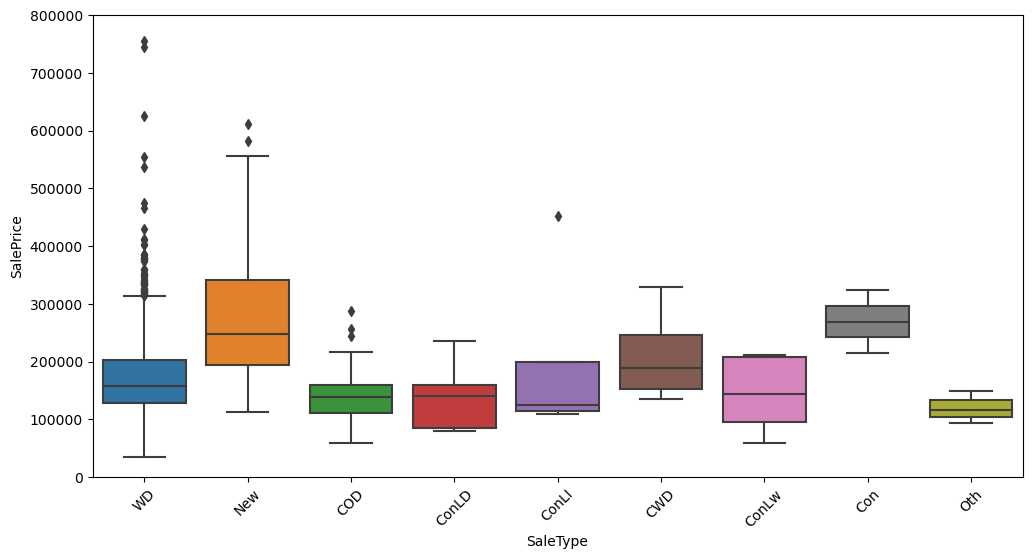

In [46]:
plt.figure(figsize=(12,6))
data=pd.concat([train["SalePrice"],train["SaleType"]],axis=1)
sns.boxplot(data=data,x="SaleType",y="SalePrice")
plt.axis(ymin=0,ymax=800000)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

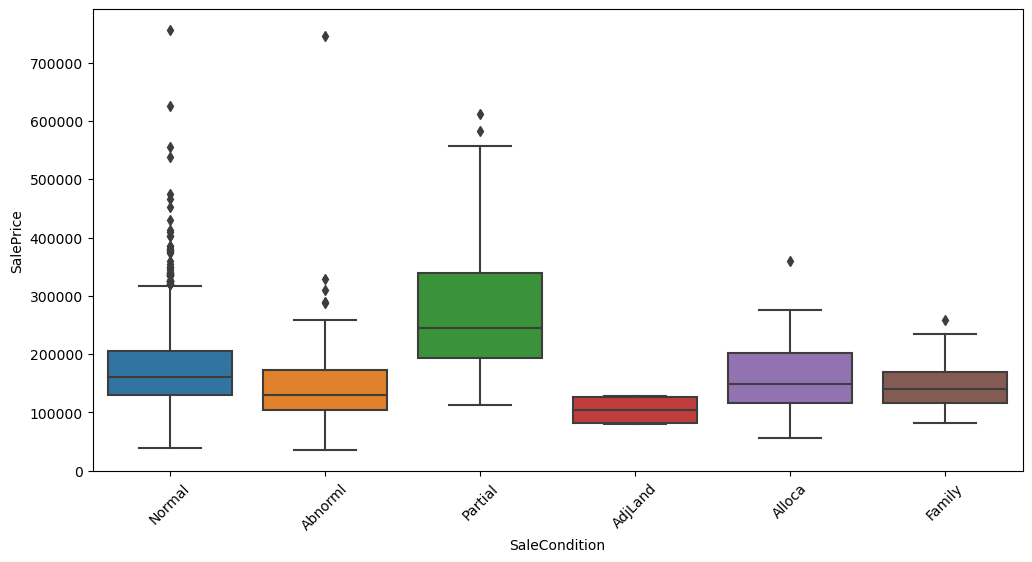

In [47]:
plt.figure(figsize=(12,6))
data=pd.concat([train["SalePrice"],train["SaleCondition"]],axis=1)
sns.boxplot(data=data,x="SaleCondition",y="SalePrice")
plt.xticks(rotation=45)

## Missing Value Analysis

In [48]:
features_with_na=[feature for feature in train.columns if train[feature].isnull().sum()>1]
for feature in features_with_na:
    print(feature,":",np.round(train[feature].isnull().mean(),4),"% of missing values")

LotFrontage : 0.1774 % of missing values
Alley : 0.9377 % of missing values
MasVnrType : 0.0055 % of missing values
MasVnrArea : 0.0055 % of missing values
BsmtQual : 0.0253 % of missing values
BsmtCond : 0.0253 % of missing values
BsmtExposure : 0.026 % of missing values
BsmtFinType1 : 0.0253 % of missing values
BsmtFinType2 : 0.026 % of missing values
FireplaceQu : 0.4726 % of missing values
GarageType : 0.0555 % of missing values
GarageYrBlt : 0.0555 % of missing values
GarageFinish : 0.0555 % of missing values
GarageQual : 0.0555 % of missing values
GarageCond : 0.0555 % of missing values
PoolQC : 0.9952 % of missing values
Fence : 0.8075 % of missing values
MiscFeature : 0.963 % of missing values


### ploting features_with_na vs SalePrice to find some insights

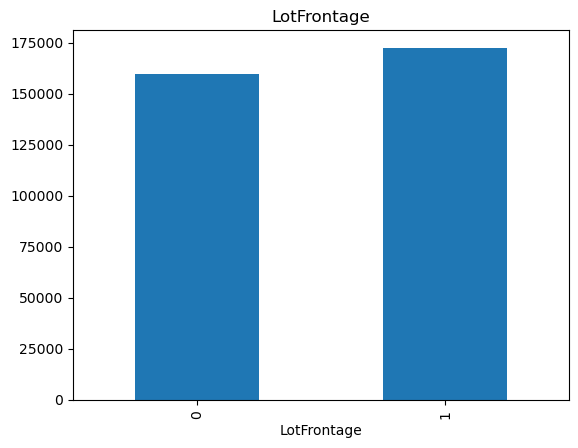

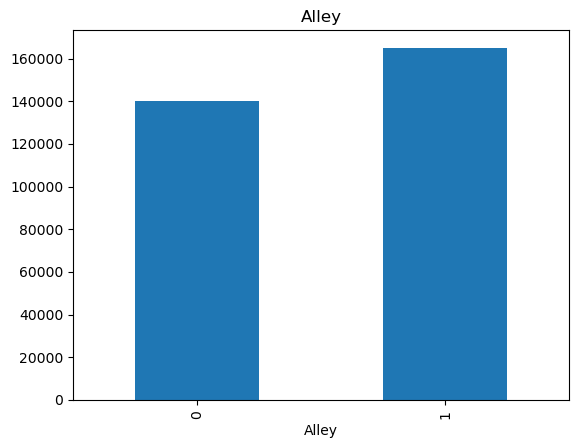

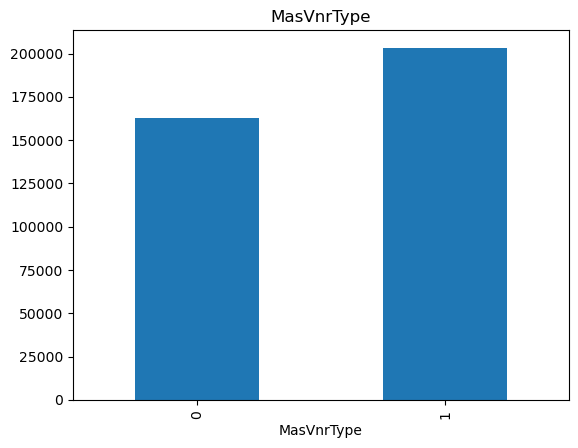

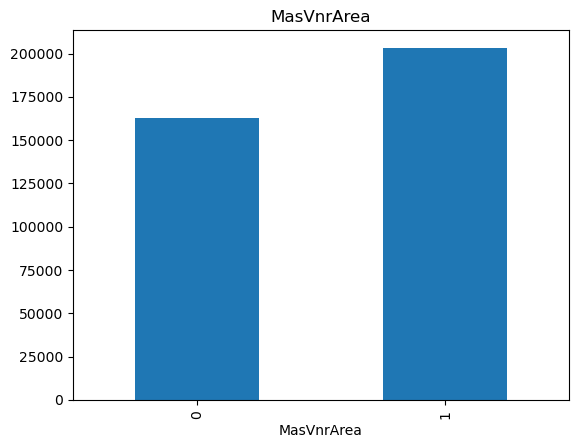

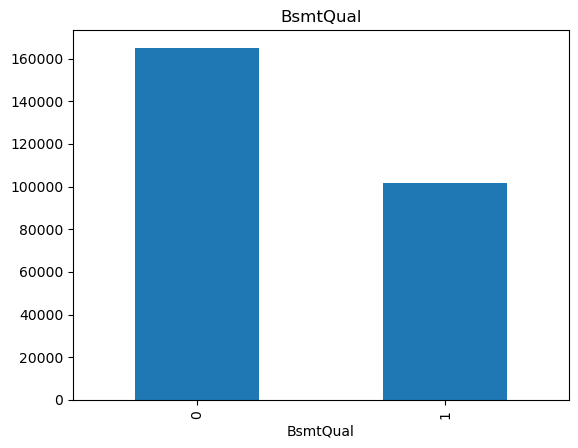

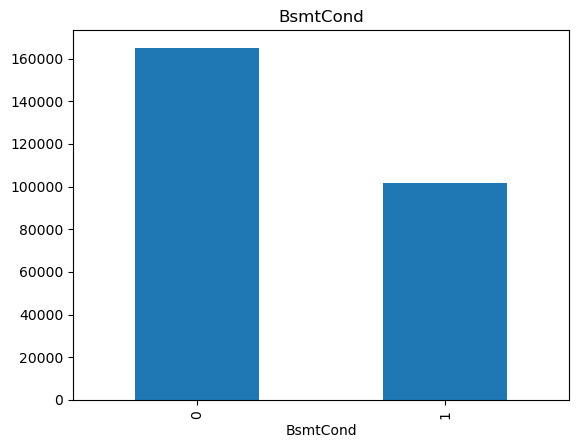

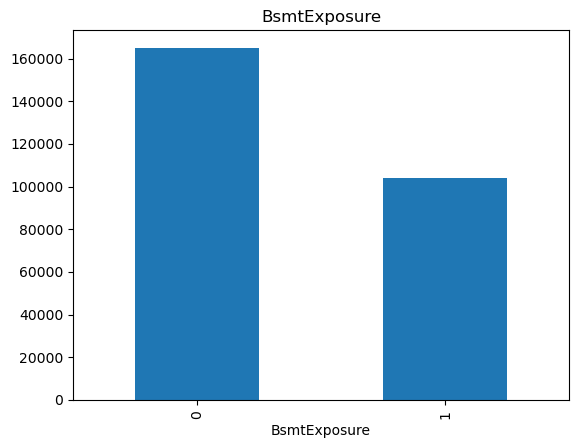

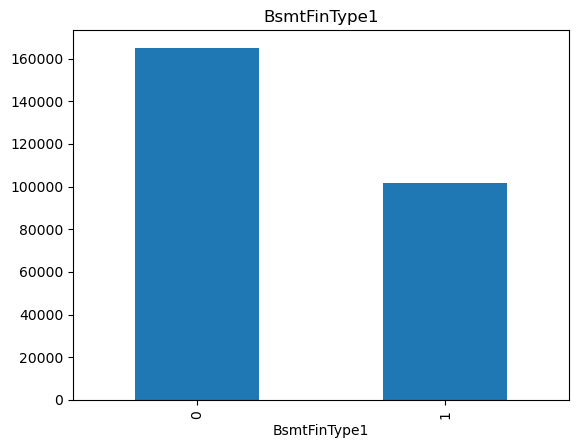

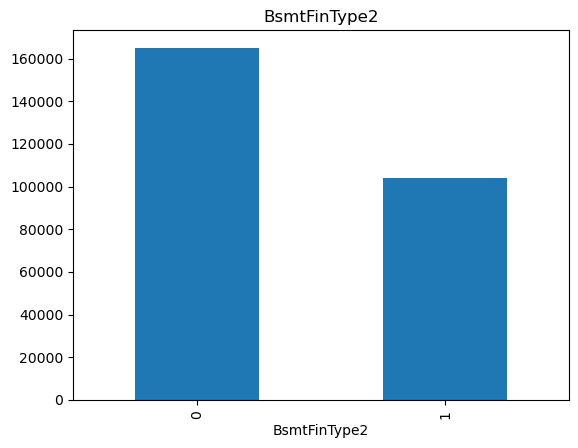

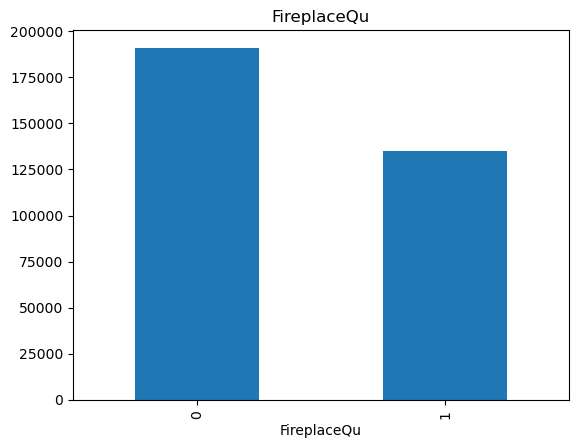

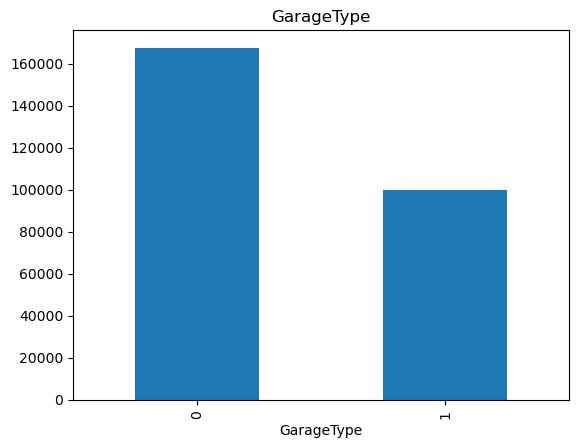

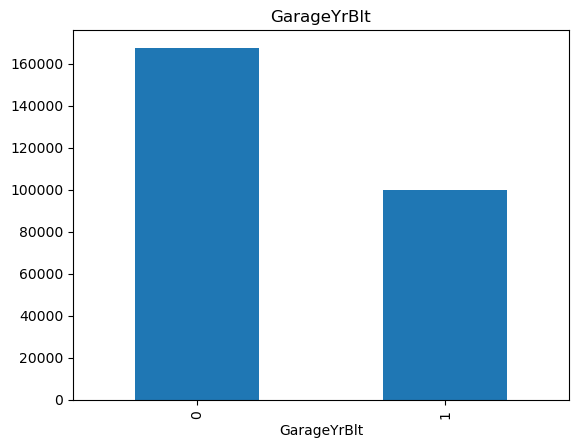

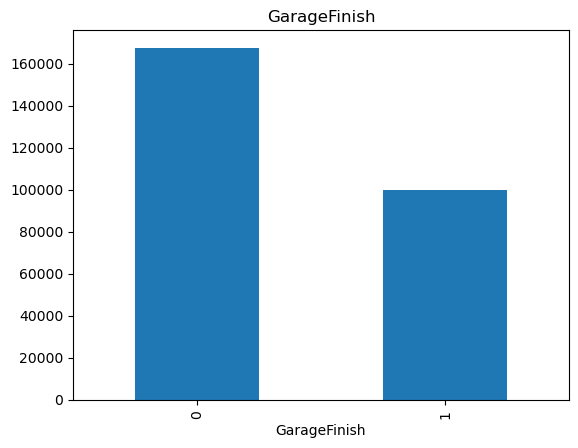

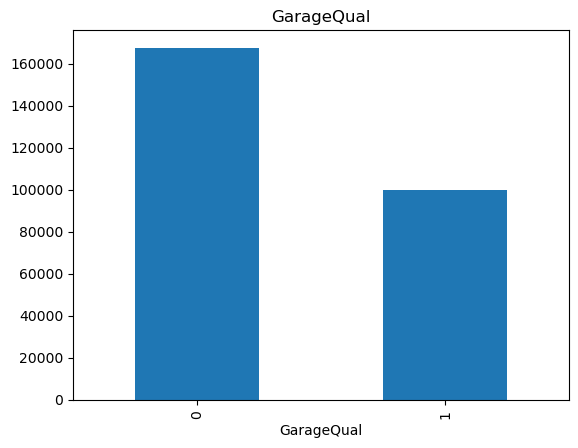

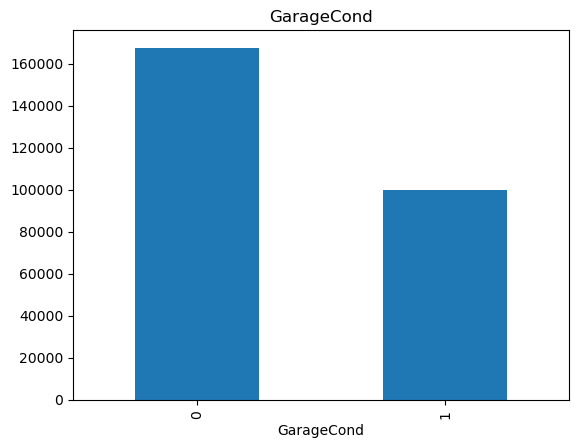

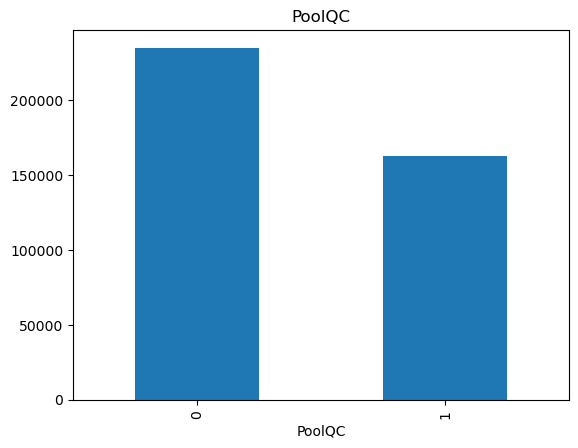

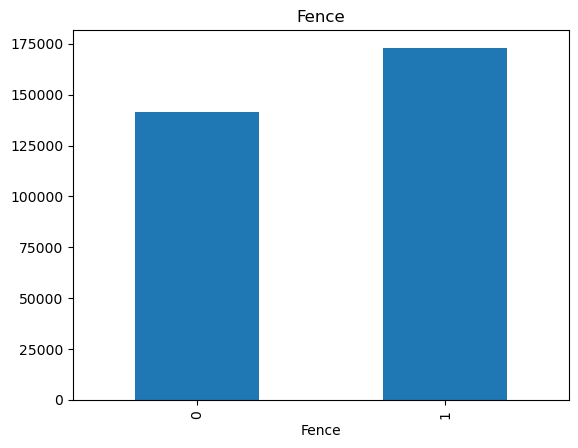

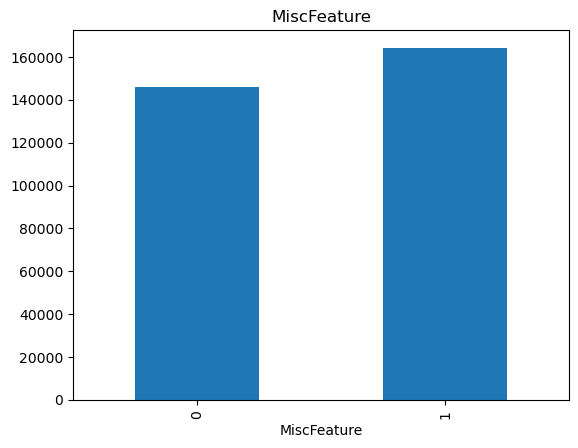

In [49]:
for feature in features_with_na:
    data=train.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

## Missing in Numerical Features

In [50]:
total=numerical_features.isnull().sum().sort_values(ascending=False)
percent=numerical_features.isnull().mean().sort_values(ascending=False)
data=pd.concat([total,percent],axis=1,keys=["Total Missing","Total Missing %"])
data.index.name="Features"
data

Total Missing  Total Missing %
Features                                     
LotFrontage              259         0.177397
GarageYrBlt               81         0.055479
MasVnrArea                 8         0.005479
Id                         0         0.000000
OpenPorchSF                0         0.000000
KitchenAbvGr               0         0.000000
TotRmsAbvGrd               0         0.000000
Fireplaces                 0         0.000000
GarageCars                 0         0.000000
GarageArea                 0         0.000000
WoodDeckSF                 0         0.000000
EnclosedPorch              0         0.000000
HalfBath                   0         0.000000
3SsnPorch                  0         0.000000
ScreenPorch                0         0.000000
PoolArea                   0         0.000000
MiscVal                    0         0.000000
MoSold                     0         0.000000
YrSold                     0         0.000000
BedroomAbvGr               0         0.000000
FullBath                   0         0.000000
MSSubClass                 0         0.000000
BsmtFinSF2                 0         0.000000
LotArea                    0         0.000000
OverallQual                0         0.000000
OverallCond                0         0.000000
YearBuilt                  0         0.000000
YearRemodAdd               0         0.000000
BsmtFinSF1                 0         0.000000
BsmtUnfSF                  0         0.000000
BsmtHalfBath               0         0.000000
TotalBsmtSF                0         0.000000
1stFlrSF                   0         0.000000
2ndFlrSF                   0         0.000000
LowQualFinSF               0         0.000000
GrLivArea                  0         0.000000
BsmtFullBath               0         0.000000
SalePrice                  0         0.000000

## Missing features Bar plot

Text(0, 0.5, 'Numerical_features')

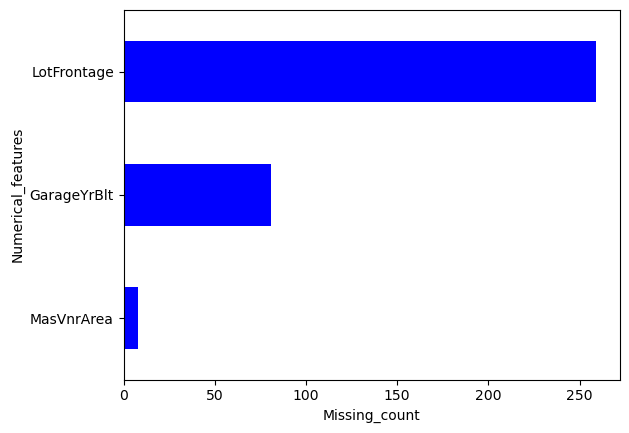

In [51]:
cols=[feature for feature in numerical_features.columns if numerical_features[feature].isnull().sum()>1]
data=numerical_features[cols].isnull().sum()
data.sort_values().plot.barh(color='blue')
plt.xlabel("Missing_count")
plt.ylabel("Numerical_features")

## Categorical Features

In [52]:
total=cat_features.isnull().sum().sort_values(ascending=False)
percent=cat_features.isnull().mean().sort_values(ascending=False)
data=pd.concat([total,percent],axis=1,keys=["Missing Count","Total Missing %"])
data

Missing Count  Total Missing %
PoolQC                  1453         0.995205
MiscFeature             1406         0.963014
Alley                   1369         0.937671
Fence                   1179         0.807534
FireplaceQu              690         0.472603
GarageType                81         0.055479
GarageCond                81         0.055479
GarageQual                81         0.055479
GarageFinish              81         0.055479
BsmtFinType2              38         0.026027
BsmtExposure              38         0.026027
BsmtFinType1              37         0.025342
BsmtQual                  37         0.025342
BsmtCond                  37         0.025342
MasVnrType                 8         0.005479
Electrical                 1         0.000685
Functional                 0         0.000000
KitchenQual                0         0.000000
CentralAir                 0         0.000000
HeatingQC                  0         0.000000
Heating                    0         0.000000
PavedDrive                 0         0.000000
SaleType                   0         0.000000
MSZoning                   0         0.000000
Street                     0         0.000000
Condition2                 0         0.000000
LotShape                   0         0.000000
LandContour                0         0.000000
Utilities                  0         0.000000
LotConfig                  0         0.000000
LandSlope                  0         0.000000
Neighborhood               0         0.000000
Condition1                 0         0.000000
BldgType                   0         0.000000
Foundation                 0         0.000000
HouseStyle                 0         0.000000
RoofStyle                  0         0.000000
RoofMatl                   0         0.000000
Exterior1st                0         0.000000
Exterior2nd                0         0.000000
ExterQual                  0         0.000000
ExterCond                  0         0.000000
SaleCondition              0         0.000000

## Missing Features Bar Plot

Text(0, 0.5, 'Features')

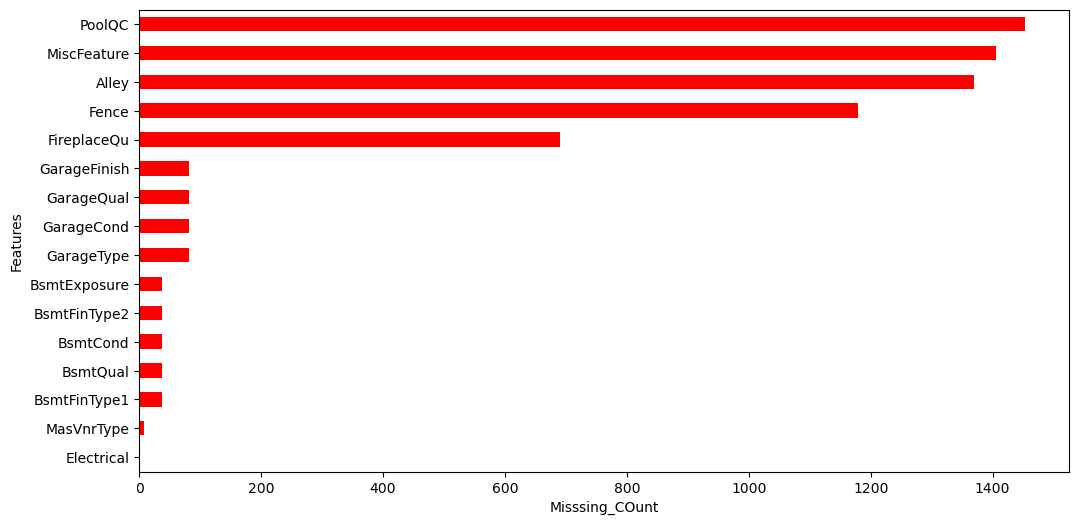

In [53]:
data=total[total>0]
plt.figure(figsize=(12,6))
data.sort_values().plot.barh(color='red')
plt.xlabel("Misssing_COunt")
plt.ylabel("Features")


## Categorical Features Exploration

In [54]:
for feature in cat_features.columns:
    print("Categorical Feature:",feature,"has    ",len(cat_features[feature].unique()))

Categorical Feature: MSZoning has     5
Categorical Feature: Street has     2
Categorical Feature: Alley has     3
Categorical Feature: LotShape has     4
Categorical Feature: LandContour has     4
Categorical Feature: Utilities has     2
Categorical Feature: LotConfig has     5
Categorical Feature: LandSlope has     3
Categorical Feature: Neighborhood has     25
Categorical Feature: Condition1 has     9
Categorical Feature: Condition2 has     8
Categorical Feature: BldgType has     5
Categorical Feature: HouseStyle has     8
Categorical Feature: RoofStyle has     6
Categorical Feature: RoofMatl has     8
Categorical Feature: Exterior1st has     15
Categorical Feature: Exterior2nd has     16
Categorical Feature: MasVnrType has     5
Categorical Feature: ExterQual has     4
Categorical Feature: ExterCond has     5
Categorical Feature: Foundation has     6
Categorical Feature: BsmtQual has     5
Categorical Feature: BsmtCond has     5
Categorical Feature: BsmtExposure has     5
Categoric

## Outliers Exploration

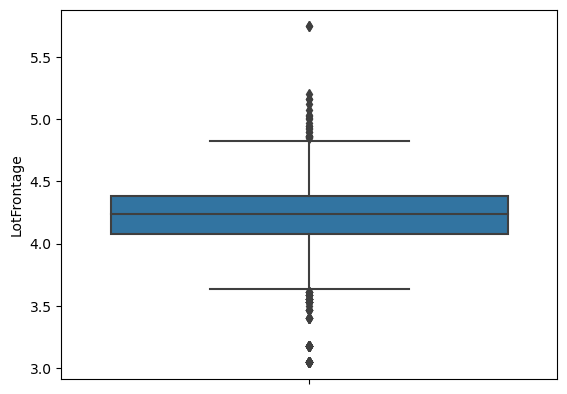

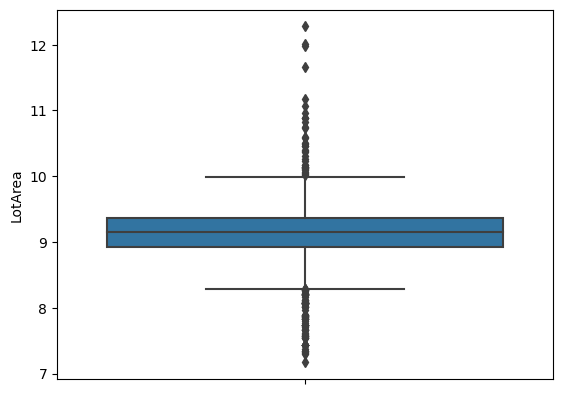

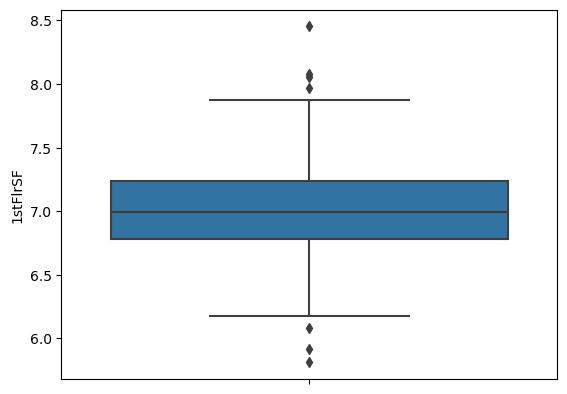

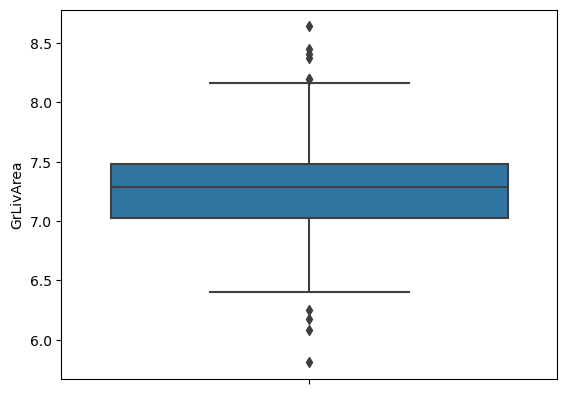

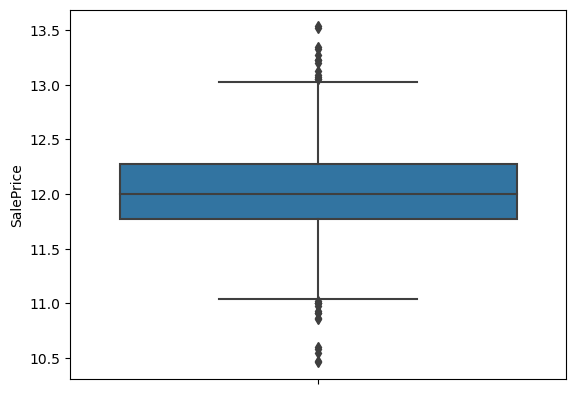

In [55]:
data=train.copy()
for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        sns.boxplot(y=np.log(data[feature]))
        plt.xlabel
        plt.show()

### count of outlier values for every continuous feature using Inter_quartile_range

In [56]:
data=train[continuous_features].describe()
IQR=data.loc["75%"]-data.loc["25%"]
df1=data.loc["25%"]-1.5*IQR
df2=data.loc["75%"]+1.5*IQR
df=pd.concat([df1,df2],axis=1,keys=["lower_limit","upper_limit"])
df.index.name="Features"
df

lower_limit  upper_limit
Features                               
LotFrontage         27.500      111.500
LotArea           1481.500    17673.500
MasVnrArea        -249.000      415.000
BsmtFinSF1       -1068.375     1780.625
BsmtFinSF2           0.000        0.000
BsmtUnfSF         -654.500     1685.500
TotalBsmtSF         42.000     2052.000
1stFlrSF           118.125     2155.125
2ndFlrSF         -1092.000     1820.000
GrLivArea          158.625     2747.625
GarageArea         -27.750      938.250
WoodDeckSF        -252.000      420.000
OpenPorchSF       -102.000      170.000
EnclosedPorch        0.000        0.000
ScreenPorch          0.000        0.000
SalePrice         3937.500   340037.500

In [57]:
for feature in continuous_features:
    c1=len(train[feature].loc[train[feature]<df["lower_limit"].loc[feature]])
    c2=len(train[feature].loc[train[feature]>df["upper_limit"].loc[feature]])
    print(feature,"has:",c1+c2,"outlier values")

LotFrontage has: 88 outlier values
LotArea has: 69 outlier values
MasVnrArea has: 96 outlier values
BsmtFinSF1 has: 7 outlier values
BsmtFinSF2 has: 167 outlier values
BsmtUnfSF has: 29 outlier values
TotalBsmtSF has: 61 outlier values
1stFlrSF has: 20 outlier values
2ndFlrSF has: 2 outlier values
GrLivArea has: 31 outlier values
GarageArea has: 21 outlier values
WoodDeckSF has: 32 outlier values
OpenPorchSF has: 77 outlier values
EnclosedPorch has: 208 outlier values
ScreenPorch has: 116 outlier values
SalePrice has: 61 outlier values


## Relationship between categorical_features and target variable

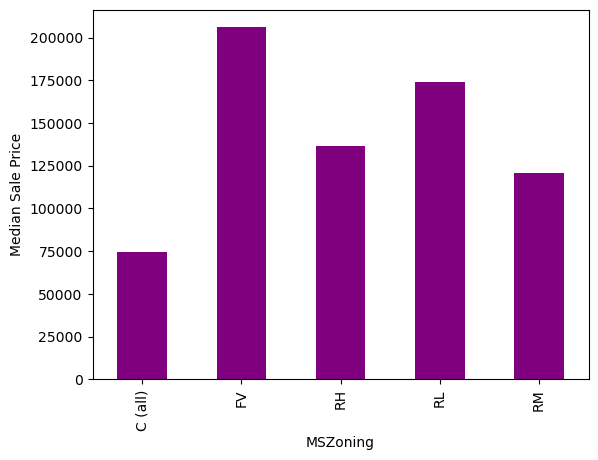

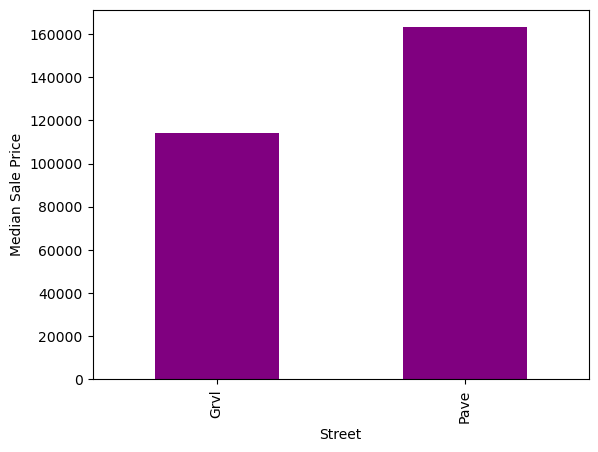

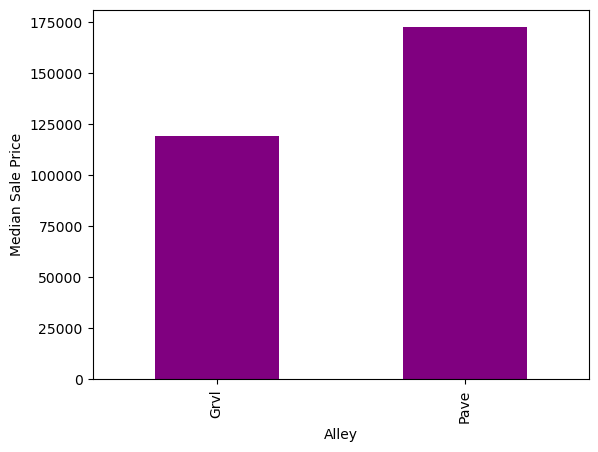

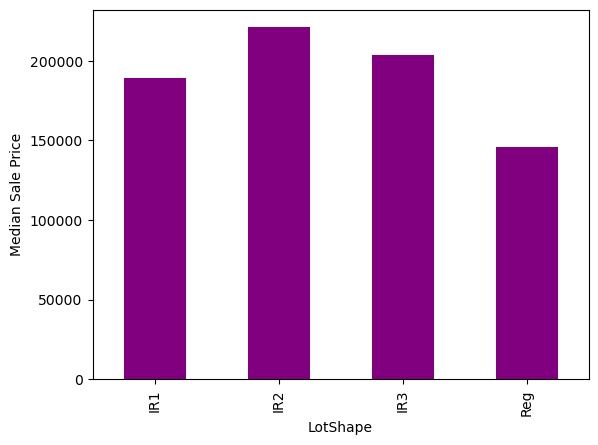

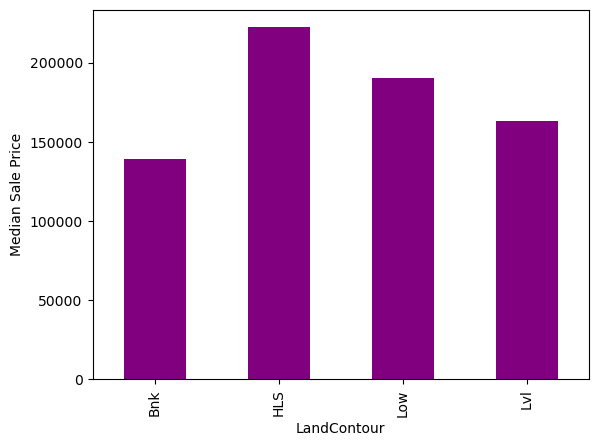

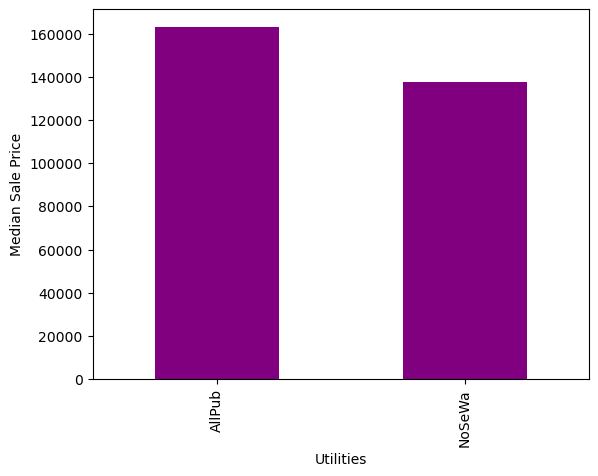

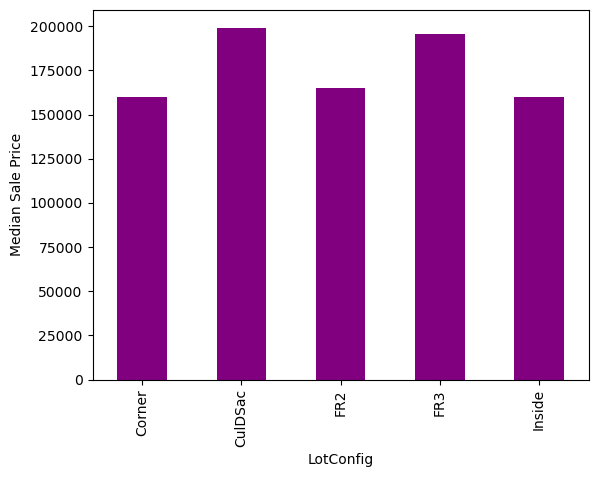

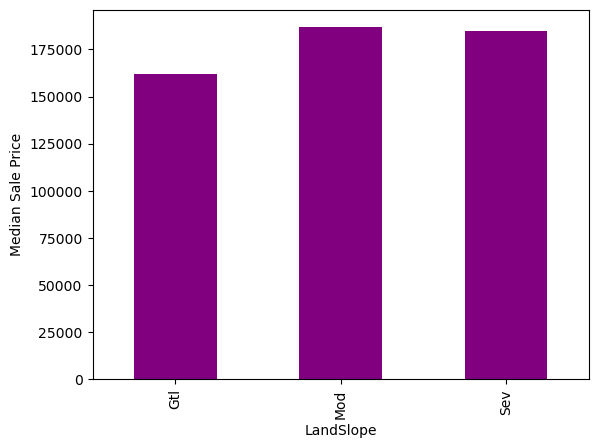

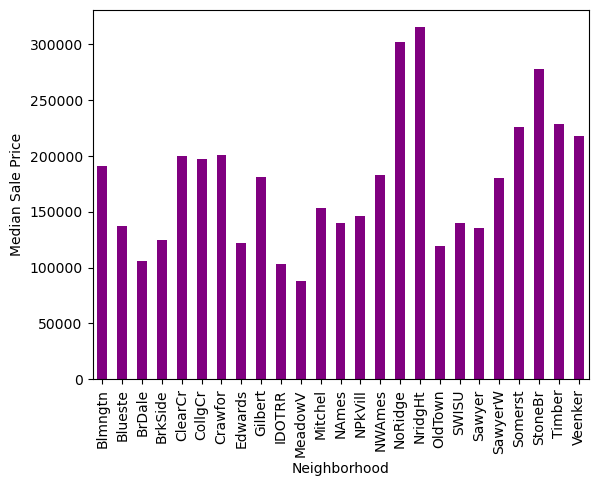

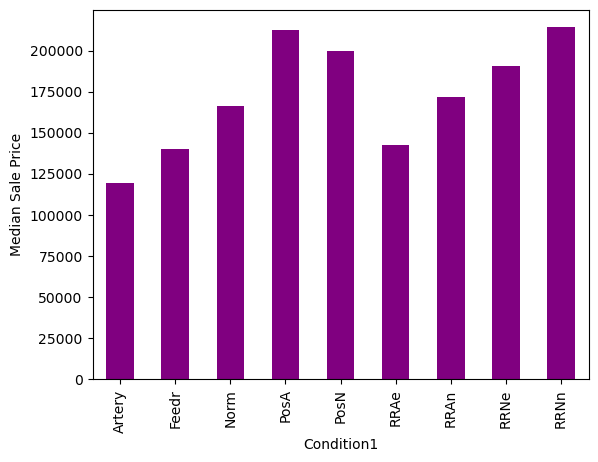

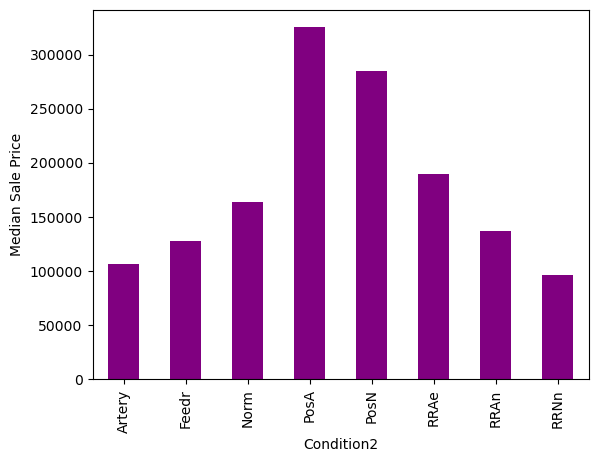

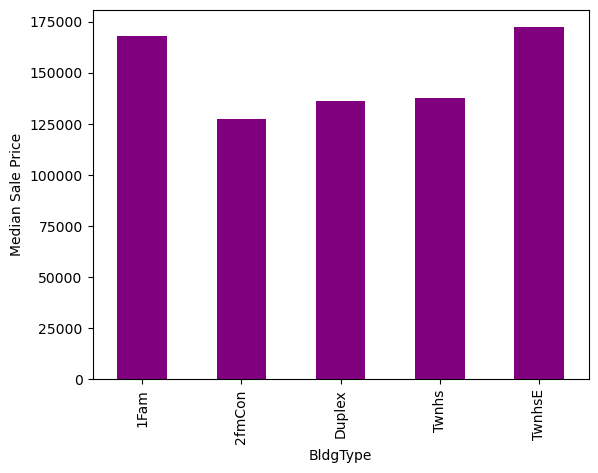

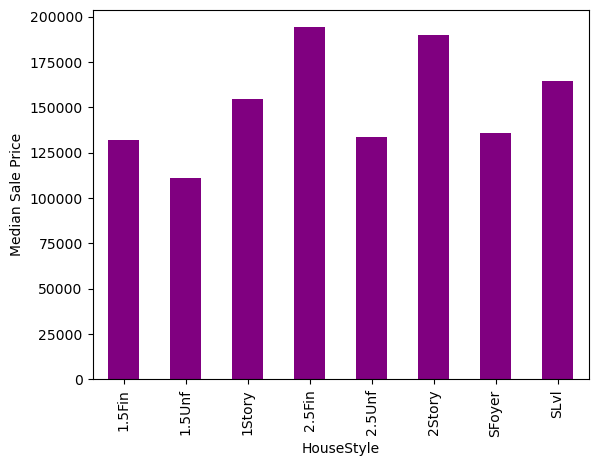

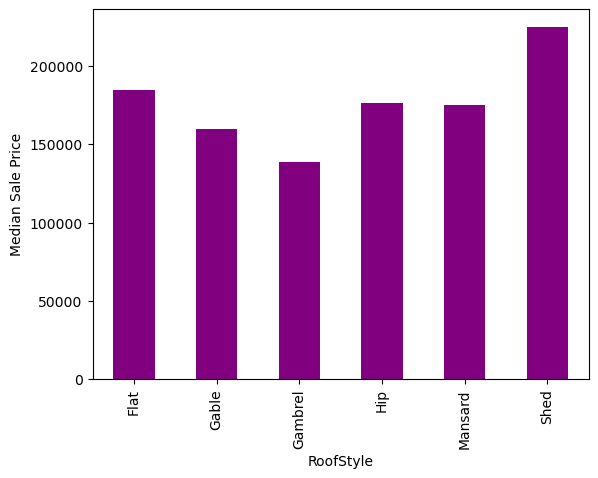

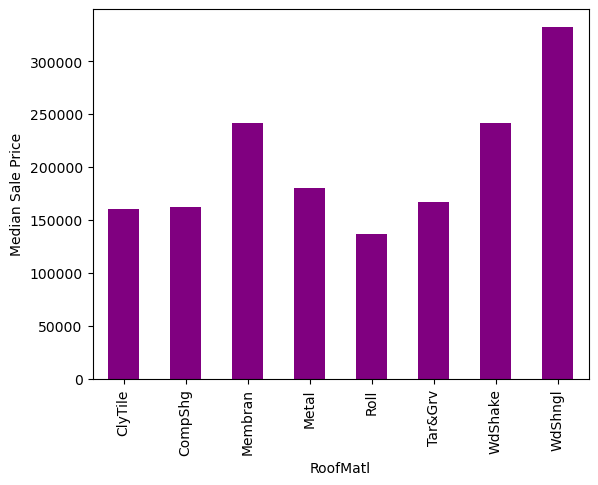

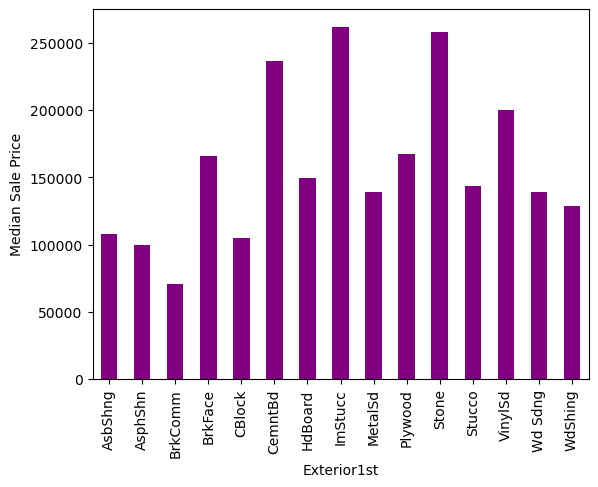

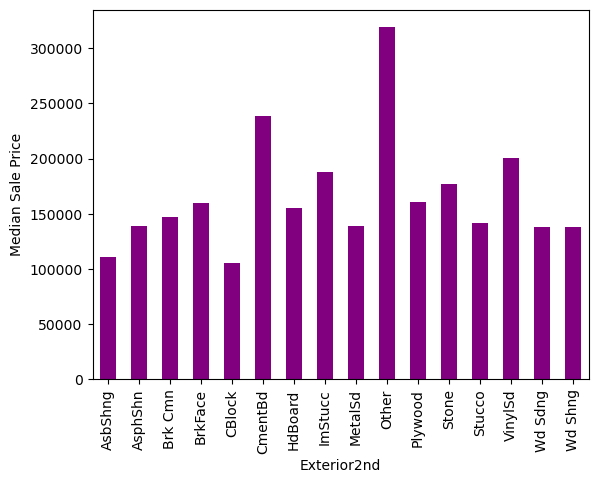

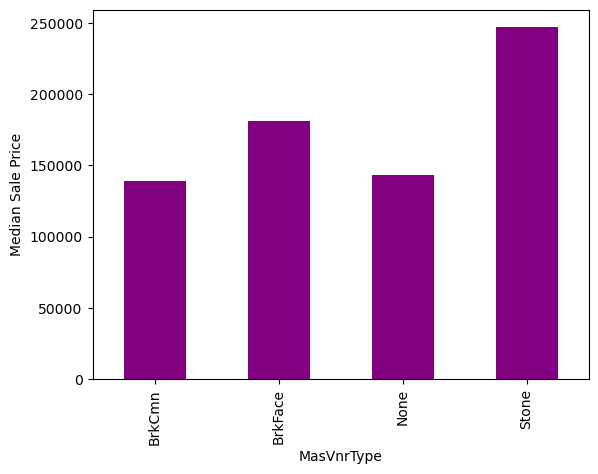

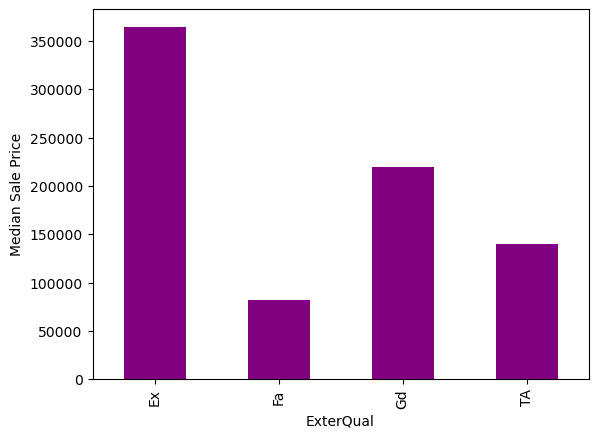

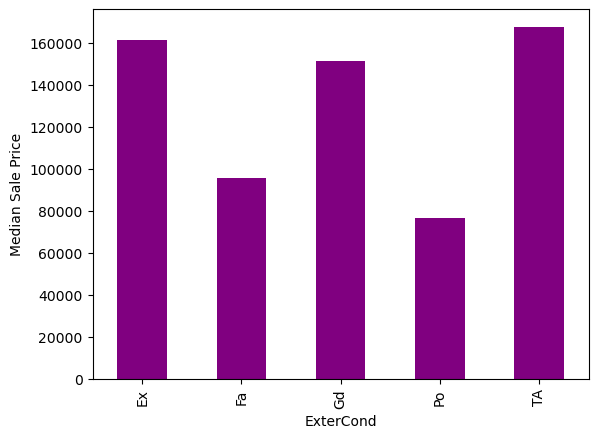

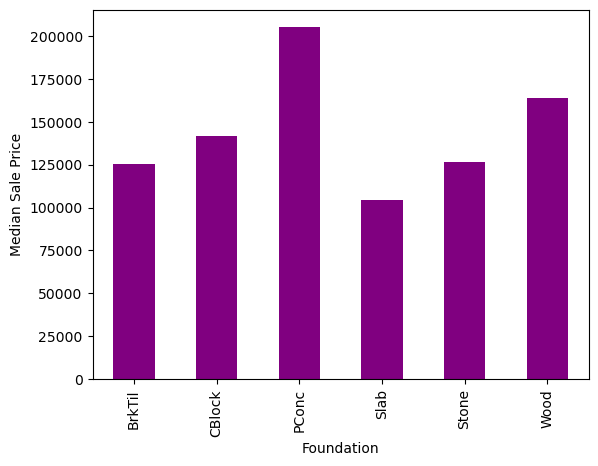

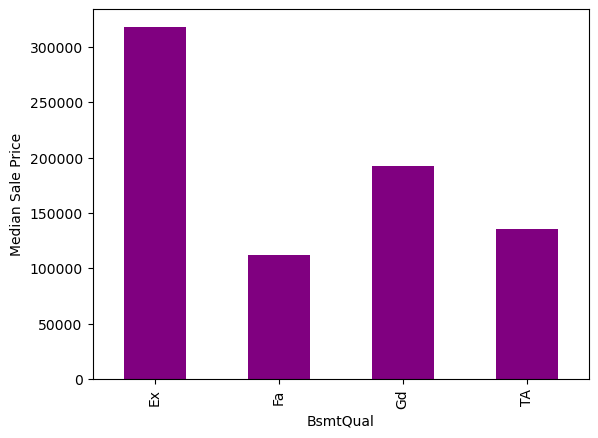

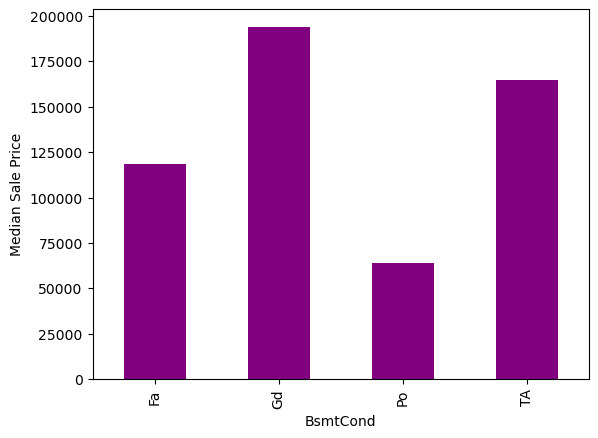

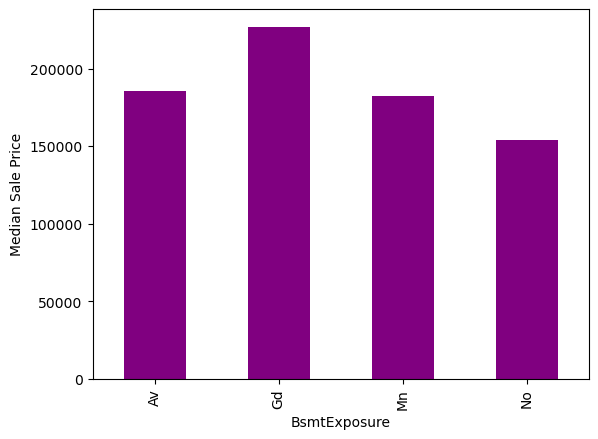

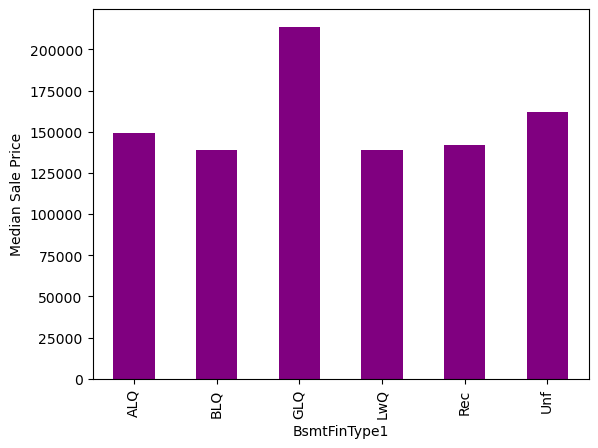

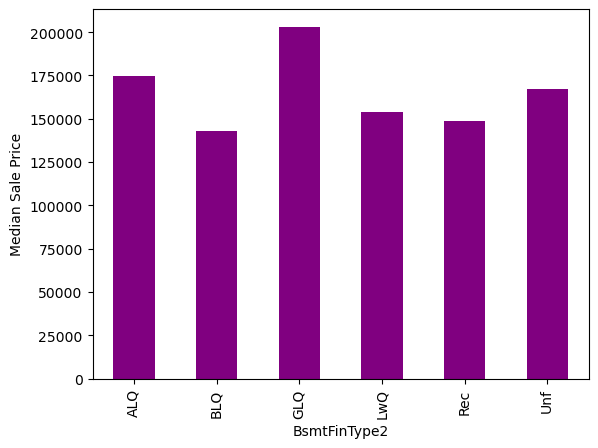

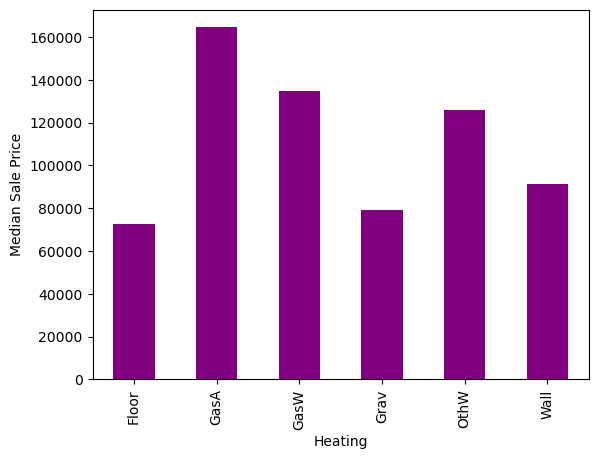

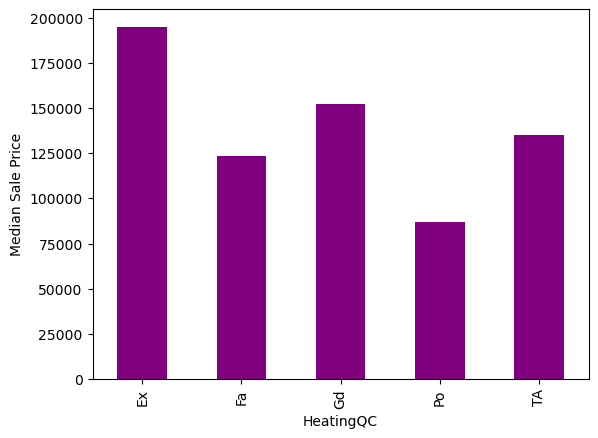

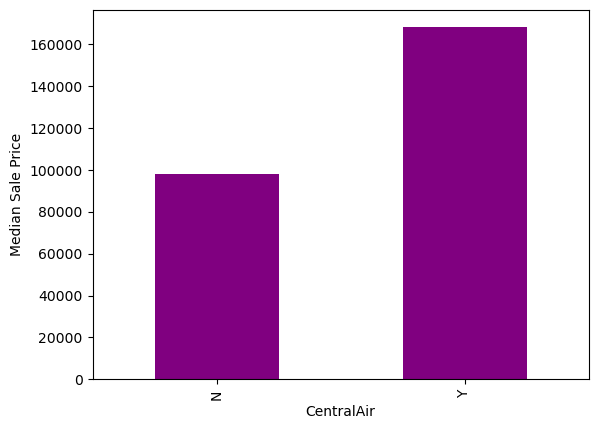

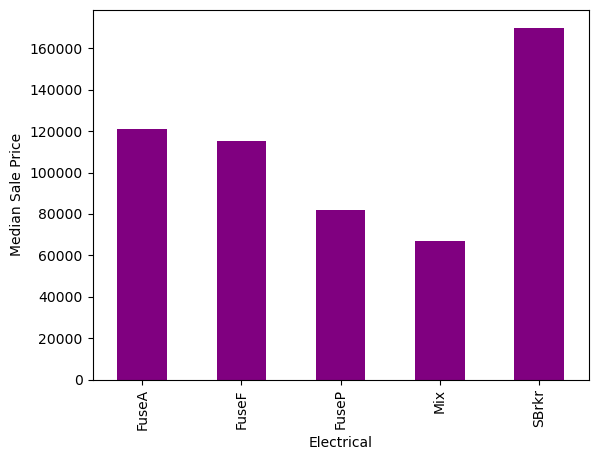

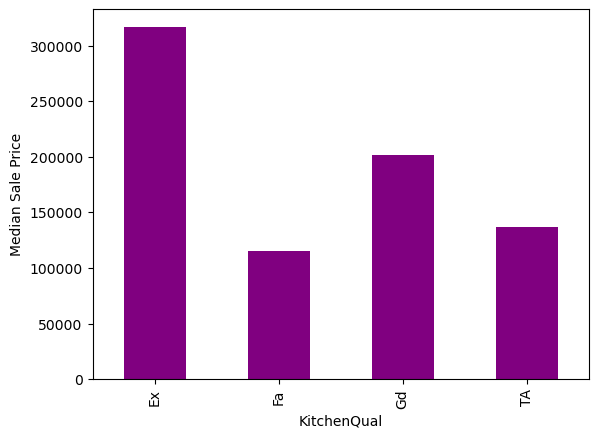

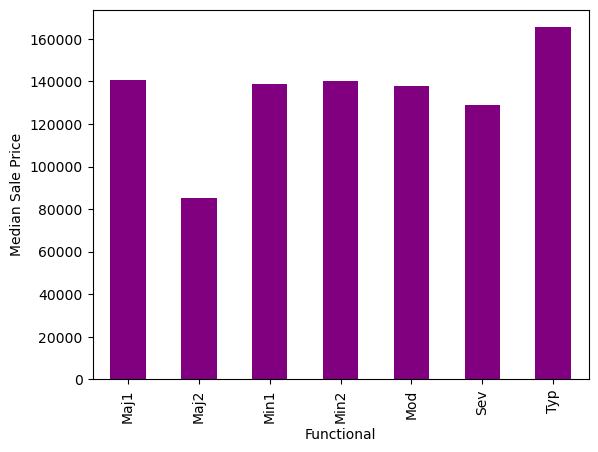

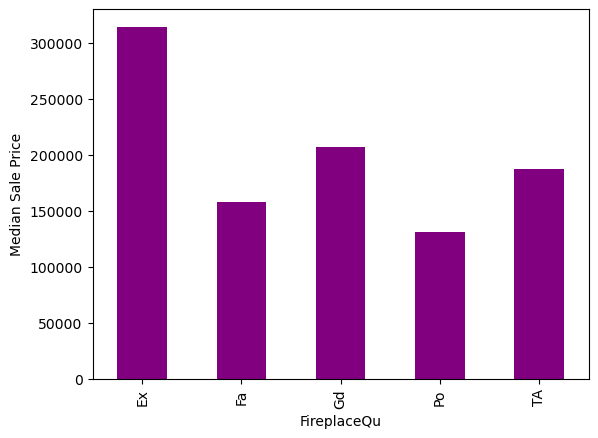

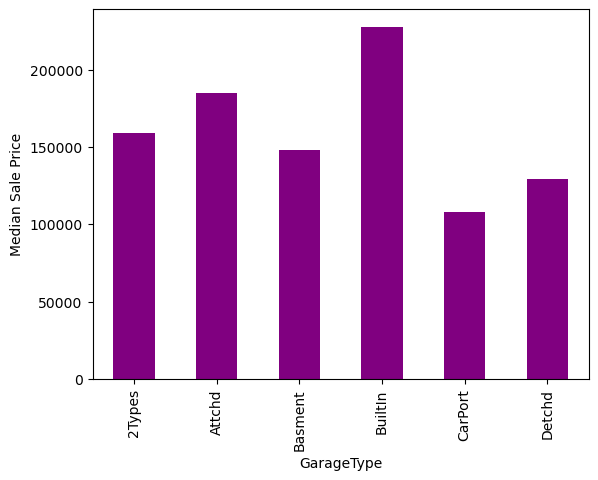

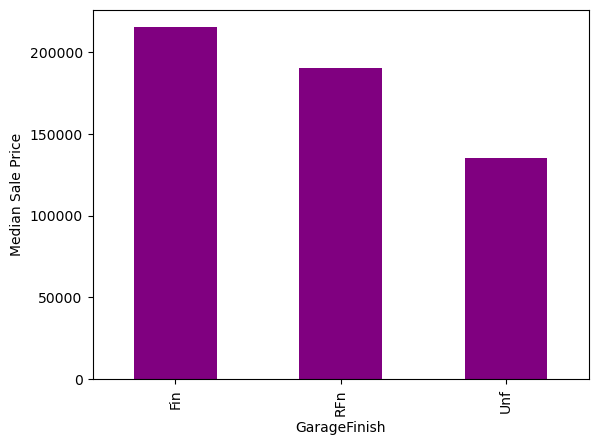

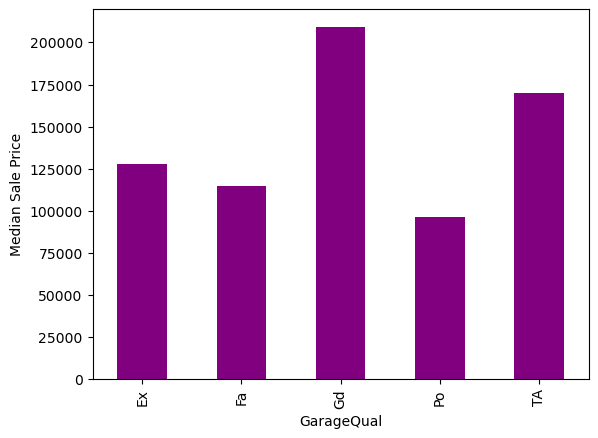

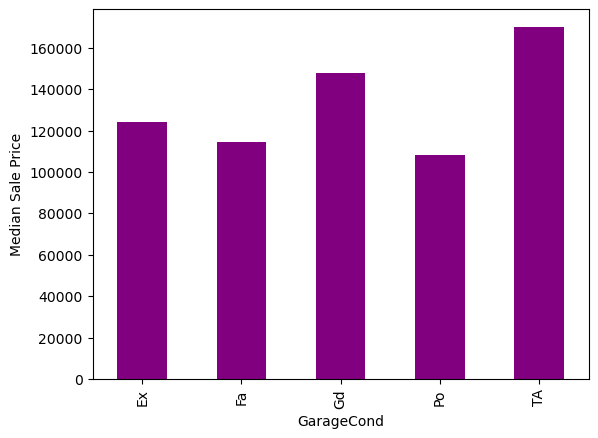

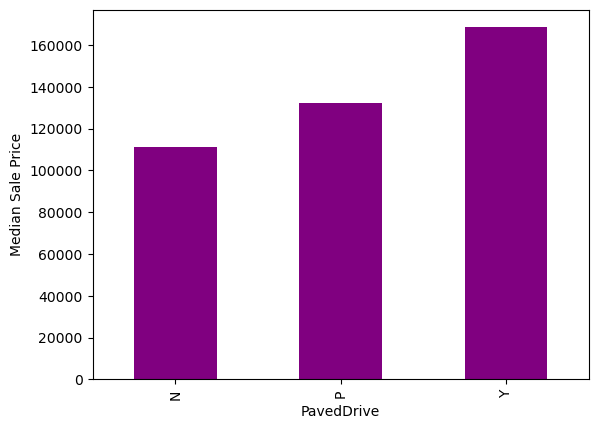

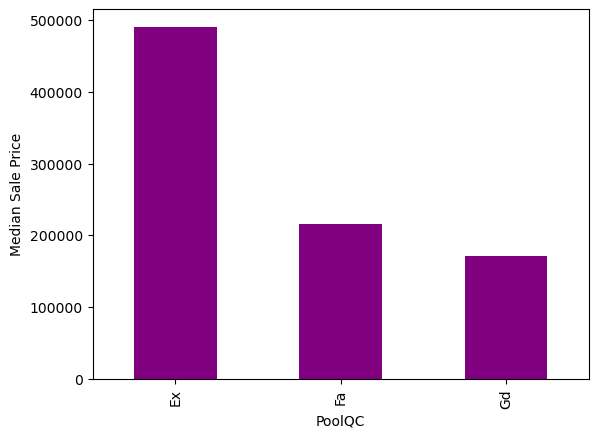

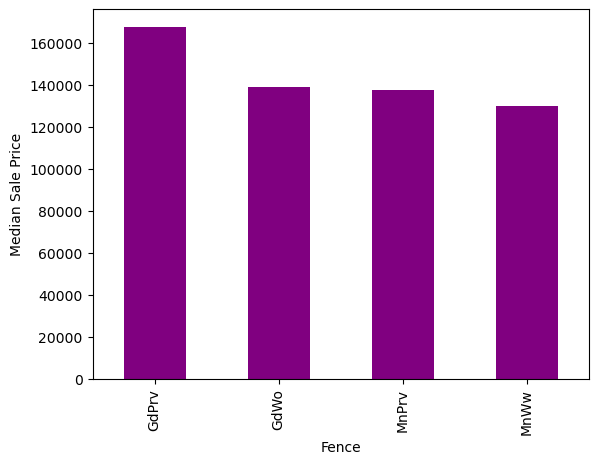

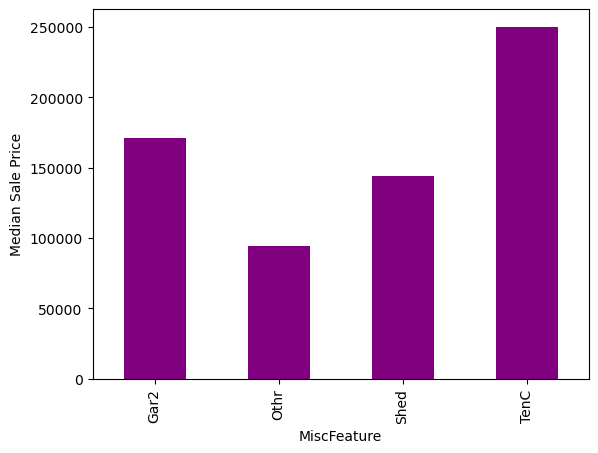

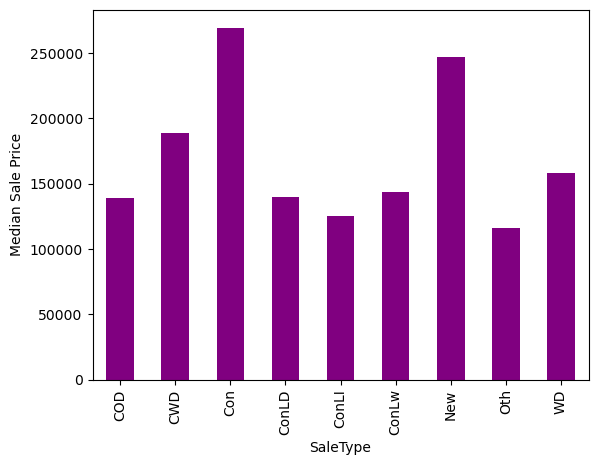

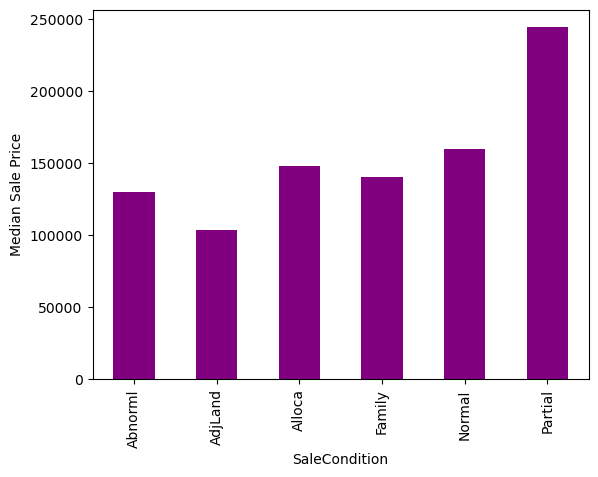

In [58]:
for feature in cat_features:
    data=train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar(color='purple')
    plt.xlabel(feature)
    plt.ylabel("Median Sale Price")
    plt.show()